In [1]:
import pandas as pd

from prepare import *
from acquire import *

import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.linear_model import LinearRegression

#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE

from prepare import *
import explore as e

In [2]:
#set seaborn color pallete
sns.set_palette('plasma')
pal = sns.set_palette('plasma')
palette = sns.color_palette().as_hex()

In [3]:
df, revert_key, replace_key = wrangle_data()

df = df.replace(replace_key)

In [4]:
train, validate, test = train_validate_test_split(df, 'is_pes')

In [5]:
train[train.columns[110:]]

marital_status                                           religion  \
1859            Divorced  Protestant (for example, Baptist, Methodist, N...   
96              Divorced                                     Roman Catholic   
420             Divorced                                           Agnostic   
1424  Never been married                                     Roman Catholic   
114             Divorced                                     Roman Catholic   
...                  ...                                                ...   
678              Married                              Nothing in particular   
957              Married                                     Roman Catholic   
239              Married  Mormon (Church of Jesus Christ of Latter-day S...   
1795             Married  Protestant (for example, Baptist, Methodist, N...   
1297             Widowed                              Nothing in particular   

                            evangelical_christian      church_attendance  \
1859     Yes, born-again or evangelical Christian                 Seldom   
96    No, not born-again or evangelical Christian            Once a week   
420                                           nan                  Never   
1424  No, not born-again or evangelical Christian  Once or twice a month   
114      Yes, born-again or evangelical Christian            Once a week   
...                                           ...                    ...   
678                                           nan                 Seldom   
957   No, not born-again or evangelical Christian     A few times a year   
239   No, not born-again or evangelical Christian            Once a week   
1795     Yes, born-again or evangelical Christian            Once a week   
1297                                          nan                 Seldom   

     political_party_identity  political_party_lean  \
1859              Independent  The Democratic Party   
96                   Democrat                   nan   
420               Independent  The Democratic Party   
1424                 Democrat                   nan   
114               Independent  The Democratic Party   
...                       ...                   ...   
678               Independent  The Republican Party   
957               Independent  The Republican Party   
239               Independent  The Republican Party   
1795              Independent  The Republican Party   
1297              Independent  The Democratic Party   

     summary_of_political_party_data   family_income_nine_categories  \
1859                    Dem/Lean Dem    $20,000 to less than $30,000   
96                      Dem/Lean Dem    $50,000 to less than $75,000   
420                     Dem/Lean Dem    $40,000 to less than $50,000   
1424                    Dem/Lean Dem    $10,000 to less than $20,000   
114                     Dem/Lean Dem    $50,000 to less than $75,000   
...                              ...                             ...   
678                     Rep/Lean Rep  $100,000 to less than $150,000   
957                     Rep/Lean Rep  $100,000 to less than $150,000   
239                     Rep/Lean Rep                $150,000 or more   
1795                    Rep/Lean Rep    $40,000 to less than $50,000   
1297                    Dem/Lean Dem    $40,000 to less than $50,000   

     family_income_three_categories  \
1859                       <$30,000   
96                      $30-$74,999   
420                     $30-$74,999   
1424                       <$30,000   
114                     $30-$74,999   
...                             ...   
678                        $75,000+   
957                        $75,000+   
239                        $75,000+   
1795                    $30-$74,999   
1297                    $30-$74,999   

                                     registered_to_vote political_views  \
1859  You are ABSOLUTELY CERTAIN that you are regist...    Conservative   
96 

In [6]:
class Attitudes_explore():
    '''
    Performs a series of analyses and explore functions on various features in our data.
    '''
    
    def __init__(self, df):
        '''
        Initializes the self of the class.
        '''
        self.df =  df
        
 
        
    def printout_all_chi_squared(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with our target. The function then prints out the test results for 
        each feature.
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()

        
        #Loop through categorical features
        for col in categorical_features:
            
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get test results of chi-squared test
            test_results = stats.chi2_contingency(contingency_table)

            #Print out results of chi-squared test for each column
            print("Correlation between", col, "and the target")
    
            print(test_results)
        
            #Space in between each feature for readability 
            print(" ")
    
    
    def printout_only_significant_p_value(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with out target. However, this function only prints out the results
        of the chi-squared test for the features which are shown to have a stastically significant
        relationship with the target. That is, the p-value of the chi-squared test is less than 0.5
        
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Loop through every cateogiral feature
        for col in categorical_features:
    
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Run a chi-squared test on the features
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #Print out the results of the chi-squared test if significant
            if p < 0.05:
                print("Correlation between", col, "and the target")
    
                print(chi2, p, degf, expected)
       
                print(" ")
                    
            
    def get_list_of_significant_columns(df, target_feature):
        '''
        This function runs a chi-squared test on every categorical feature in the dataframe
        with the target variable. The function returns of list of features that have a stastically
        signficant relationship with the target
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()

      
        #Make empty list of significant feature names
        significant_features = []
        
        #Loop through categorical features
        for col in categorical_features:
    
            #Create contigency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get the results of the chi-squared test
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p value is less than 0.05, append feature to list
            if p < 0.05:  
                
                significant_features.append(col)
        
        #Return list
        return(significant_features)
        
        
    def printout_insignificant_p_value(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with the target variable. If the chi-squared test reveals an
        insignificant relationship with the target, this function prints the result of the
        chi-squared test.
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Loop through categorical features
        for col in categorical_features:
    
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])

            #Run chi-squared test
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p-value is greater than or equal to 0,05, print result of chi-sqared
            if p >= 0.05:
                print("Correlation between", col, "and the target")
    
                print(chi2, p, degf, expected)
       
                print(" ")
        
        
    def get_list_of_insignificant_columns(df, target_feature):
        '''
        This function loops through every categorical features and performs a chi-squared
        test with the target variable. If the chi-sqaured test reveals an insignificant 
        relationship with the target feature, the categorical feature is appended to a list
        of insignificant features.
        ''' 
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Make list of insignificant features
        insignificant_features = []
        
        #Loop through categorical features
        for col in categorical_features:
    
            #Make contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])

            #Run chi-squared
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p value is greater than or equal to 0.05, append feature to list.
            if p >= 0.05:
                
                insignificant_features.append(col)
            
        return(insignificant_features)
    
    
    def get_k_best(df, n, target_feature, columns_to_drop):
        '''
        This function takes a DataFrame and makes dummy variables.
        The function then splits the data into X, the predictive features, and y, the 
        target feature. It then runs Select K Best to determine the features most predictive
        of the target.
        
        Note: Since, we created dummies, the name of the target feature has _1 added to the end.
        '''
        
        df = df.drop([columns_to_drop])
        
        #Get dummies
        df_dummies = pd.get_dummies(df, drop_first = True)
        
        #Split X and y
        X, y = df_dummies.drop(columns = [target_feature, 'qkey']), df_dummies[target_feature]
        
        # Create model
        kbest = SelectKBest(f_regression, k=n)
        
        #Fit the model
        kbest.fit(X, y)
        
        #Return the most predictive columns
        return X.columns[kbest.get_support()]
    
    def get_recursive_features(df, n, target_feature, columns_to_drop):
        '''
        This function takes a DataFrame and makes dummy variables. 
        The function then splits teh data into X, the predictive features, and y, the target feature.
        It then runs Recursive Feature Elimination to determine the features most predictive of target.
        '''
        df = df.drop([columns_to_drop])
        
        #Get dummies
        df_dummies = pd.get_dummies(df, drop_first = True)
        
        #Split X and y
        X, y = df_dummies.drop(columns = [target_feature, 'qkey']), df_dummies[target_feature]
        
        #Create model
        rfe = RFE(estimator=LinearRegression(), n_features_to_select= n)
        #Fit the model
        rfe.fit(X, y)
        return X.columns[rfe.get_support()]
    
    def bar_plot(df, x_val, target):
        sns.barplot(x=x_val,y=target,data=df)
        plt.tight_layout()
        plt.show()
        
    def count_plot(df, col):
        plt.figure(figsize=(8,5))
        sns.countplot(x=col ,data=df)
        
        plt.tight_layout()
        plt.show()

## Let's explore age groups and income-related topics

In [8]:
divisive_topics = ['priority_increase_military', 'share_americans_in_lower_class', 'happen_walthgap']

In [9]:
income = ['family_income_three_categories', 'family_income_nine_categories', 'happen_wealthgap', 
         'share_americans_in_upper_class', 'share_americans_in_middle_class', 'share_americans_in_lower_class']

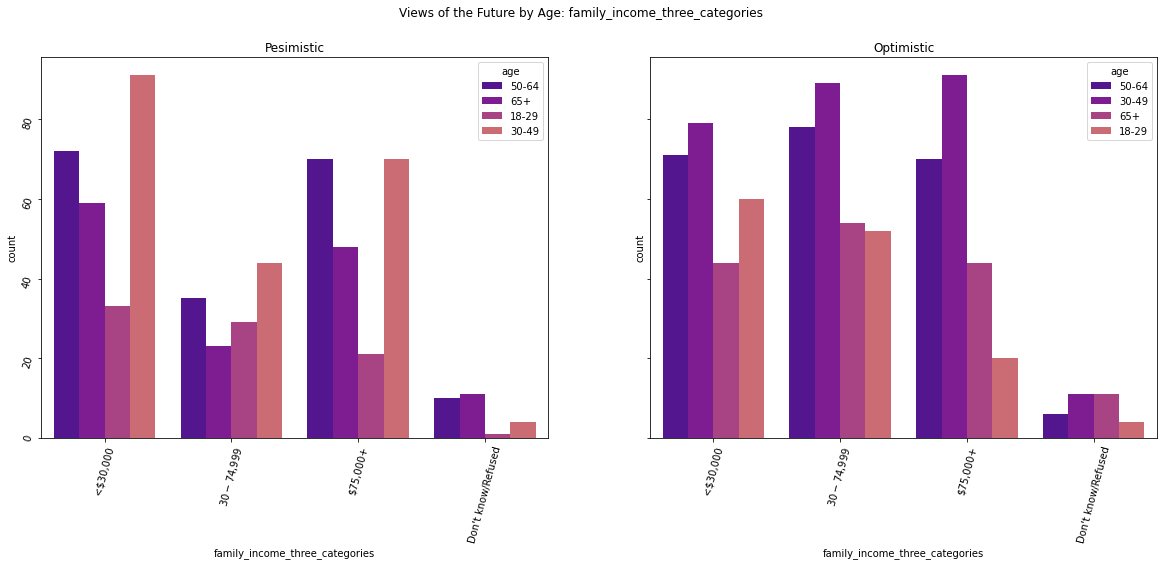

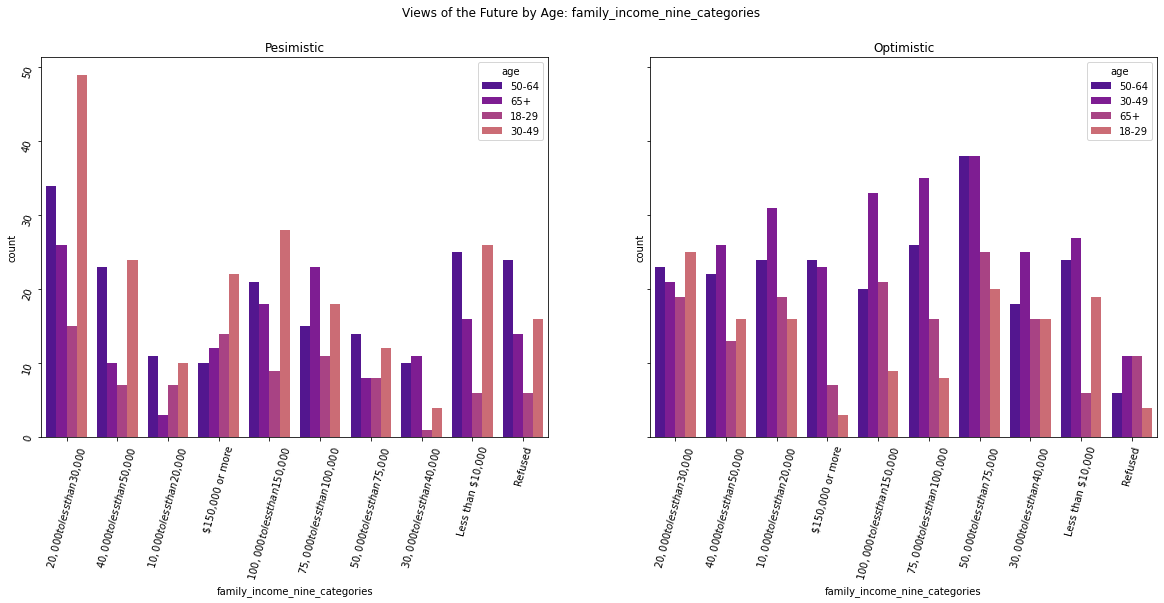

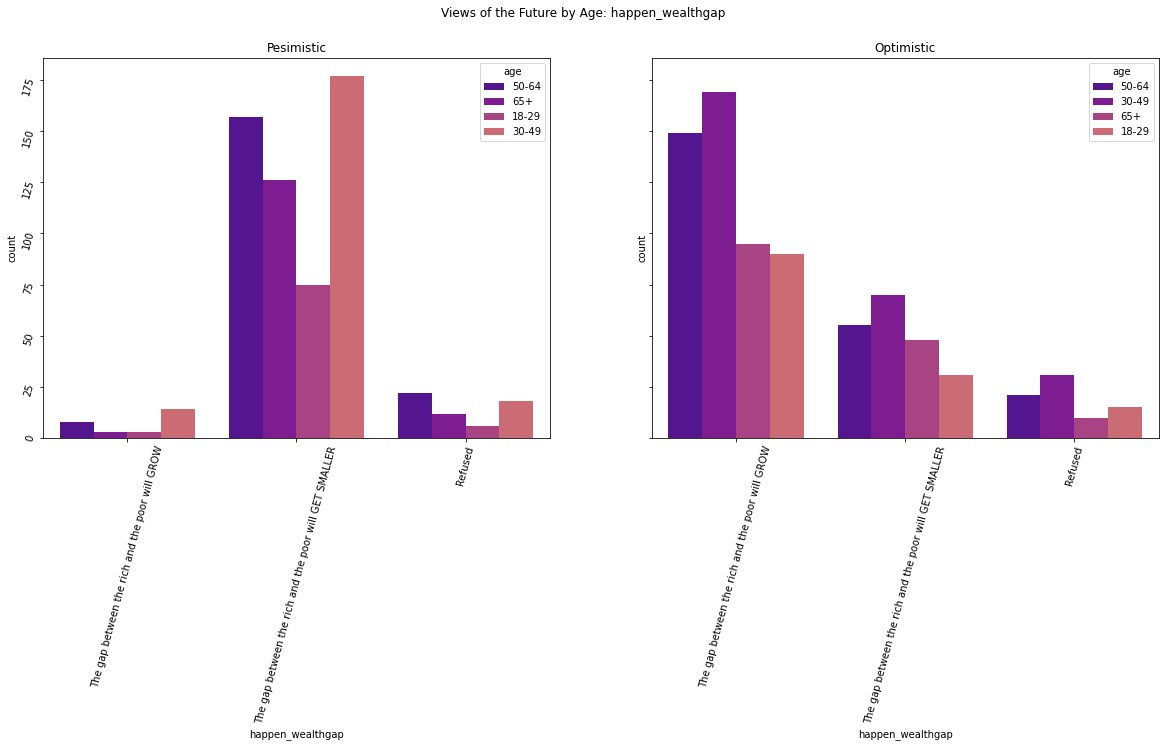

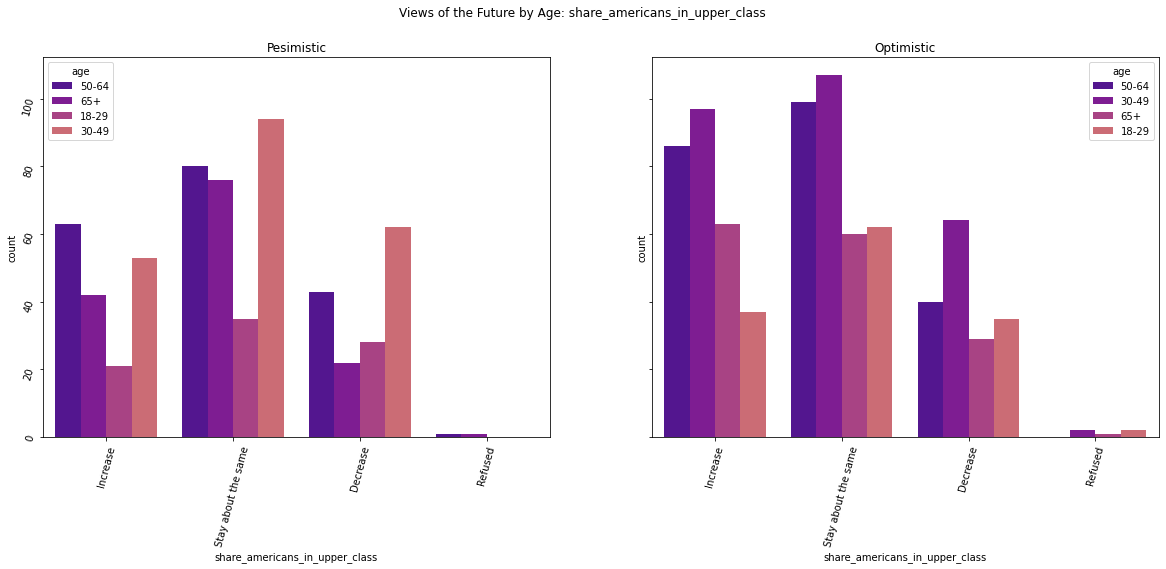

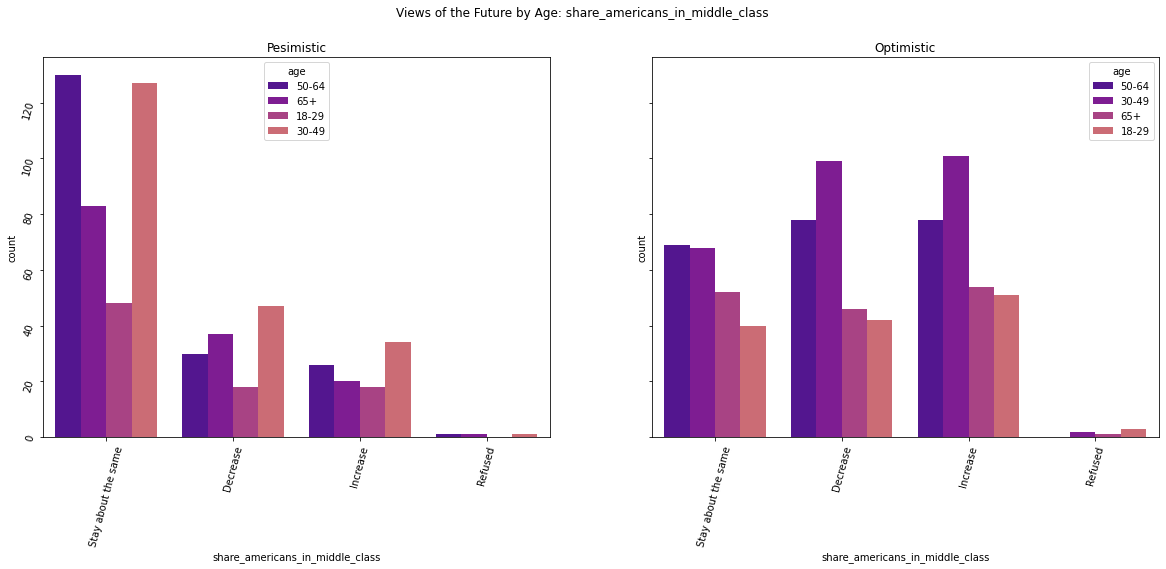

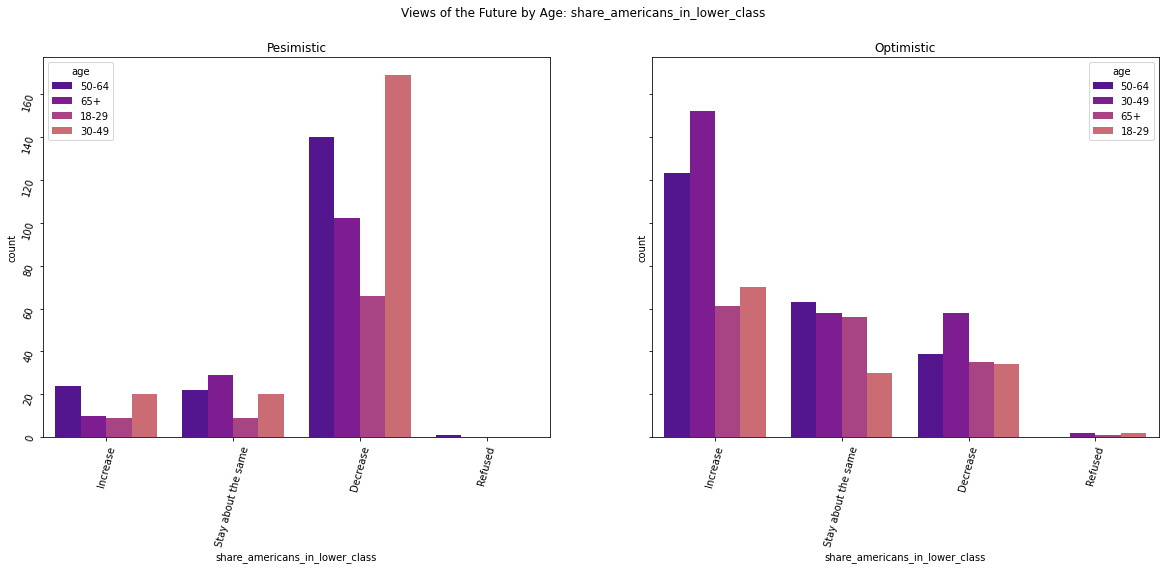

In [10]:
for col in income:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

In [11]:
df.columns[90:]

Index(['sci_tech', 'major_corps', 'rel_groups', 'gov_in_wash', 'state_local',
       'media', 'military', 'college_uni', 'schools', 'metro', 'census_region',
       'age', 'sex', 'highest_education_three_categories',
       'highest_education_six_categories', 'hispanic_or_latino', 'race',
       'race_and_ethnicity', 'birthplace', 'us_citizen', 'marital_status',
       'religion', 'evangelical_christian', 'church_attendance',
       'political_party_identity', 'political_party_lean',
       'summary_of_political_party_data', 'family_income_nine_categories',
       'family_income_three_categories', 'registered_to_vote',
       'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
       'pes_val', 'is_very_pes', 'is_very_opt'],
      dtype='object')

In [12]:
train.family_income_nine_categories.value_counts()

$50,000 to less than $75,000      245
$100,000 to less than $150,000    159
$75,000 to less than $100,000     158
$20,000 to less than $30,000      146
$30,000 to less than $40,000      142
$40,000 to less than $50,000      141
$10,000 to less than $20,000      133
$150,000 or more                  117
Less than $10,000                 108
Refused                            59
Name: family_income_nine_categories, dtype: int64

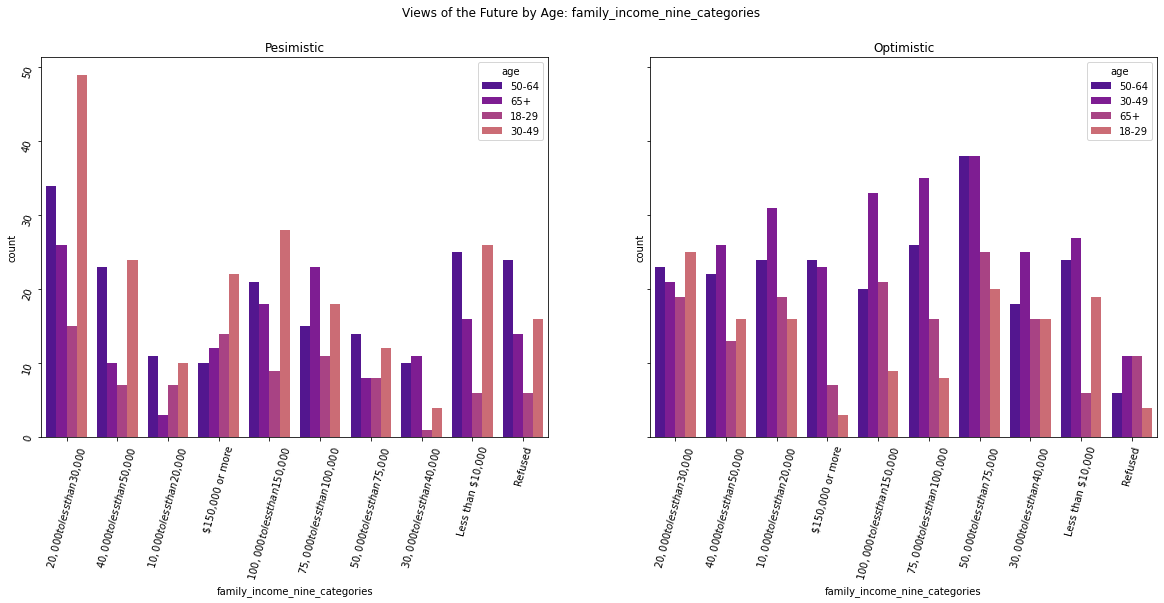

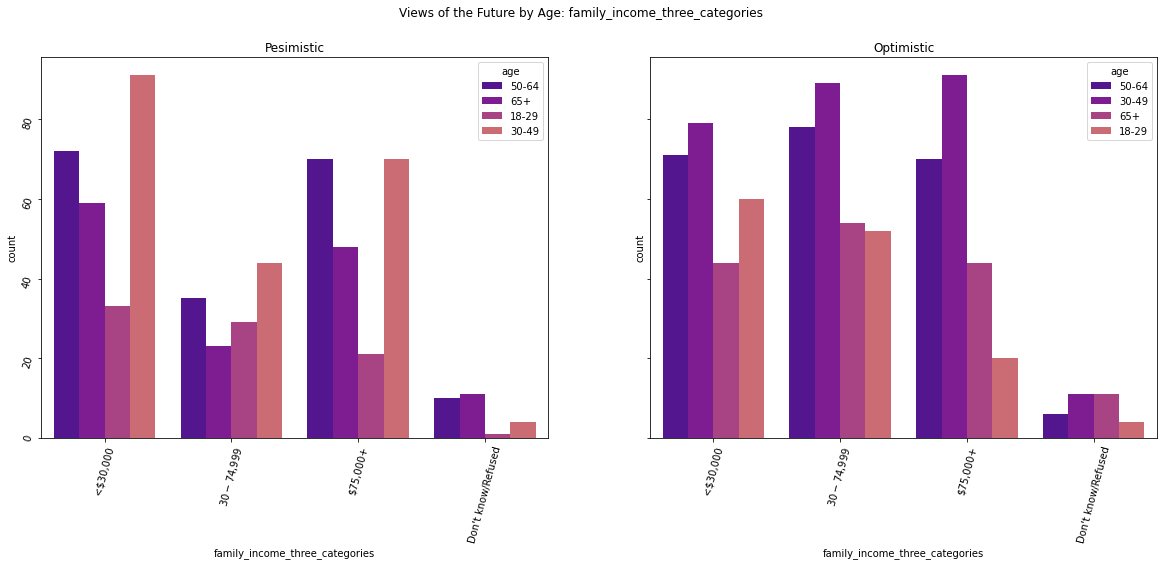

In [13]:
for col in ['family_income_nine_categories', 'family_income_three_categories']:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

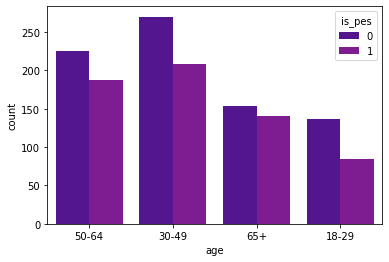

In [14]:
sns.countplot(data=train[train.age!='DK/REF'], x='age', hue='is_pes')
plt.show()

In [15]:
pes_percent = []

In [16]:
edu_percent = pd.crosstab(index=train['age'], columns=train['highest_education_six_categories'])
edu_percent

highest_education_six_categories  Associate's degree  \
age                                                    
18-29                                             21   
30-49                                             53   
50-64                                             25   
65+                                               16   
DK/REF                                             0   

highest_education_six_categories  College graduate/some post grad  \
age                                                                 
18-29                                                          63   
30-49                                                         114   
50-64                                                          83   
65+                                                            43   
DK/REF                                                          1   

highest_education_six_categories  Don't know/Refused  High school graduate  \
age                                                                          
18-29                                              0                    65   
30-49                                              2                   116   
50-64                                              2                   147   
65+                                                0                    99   
DK/REF                                             0                     1   

highest_education_six_categories  Less than high school  Postgraduate  \
age                                                                     
18-29                                                15            13   
30-49                                                34            79   
50-64                                                30            45   
65+                                                  24            55   
DK/REF                                                1             0   

highest_education_six_categories  Some college, no degree  
age                                                        
18-29                                                  43  
30-49                                                  81  
50-64                                                  80  
65+                                                    57  
DK/REF                                                  0

In [17]:
df.columns

Index(['qkey', 'device_type', 'language', 'form', 'attitude', 'avg_family',
       'happen_general', 'happen_health', 'happen_race', 'happen_usa',
       ...
       'family_income_three_categories', 'registered_to_vote',
       'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
       'pes_val', 'is_very_pes', 'is_very_opt'],
      dtype='object', length=128)

In [18]:
pol_party_percent = pd.crosstab(index=df['age'], columns=train['political_views'], normalize='index')
pol_party_percent

political_views  Conservative   Liberal  Moderate   Refused  \
age                                                           
18-29                0.118182  0.259091  0.409091  0.031818   
30-49                0.208768  0.198330  0.421712  0.020877   
50-64                0.250000  0.143204  0.419903  0.029126   
65+                  0.333333  0.176871  0.316327  0.006803   
DK/REF               0.666667  0.000000  0.000000  0.000000   

political_views  Very conservative  Very liberal  
age                                               
18-29                     0.036364      0.145455  
30-49                     0.058455      0.091858  
50-64                     0.087379      0.070388  
65+                       0.108844      0.057823  
DK/REF                    0.333333      0.000000

In [19]:
df.political_views.value_counts()

Moderate             977
Conservative         570
Liberal              480
Very liberal         213
Very conservative    204
Refused               71
Name: political_views, dtype: int64

---
---
---

# Univariate

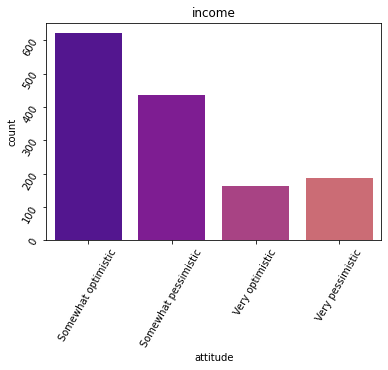

In [20]:
sns.countplot(data=train, x='attitude').set_title('income')
plt.tick_params(labelrotation=60)
plt.show()

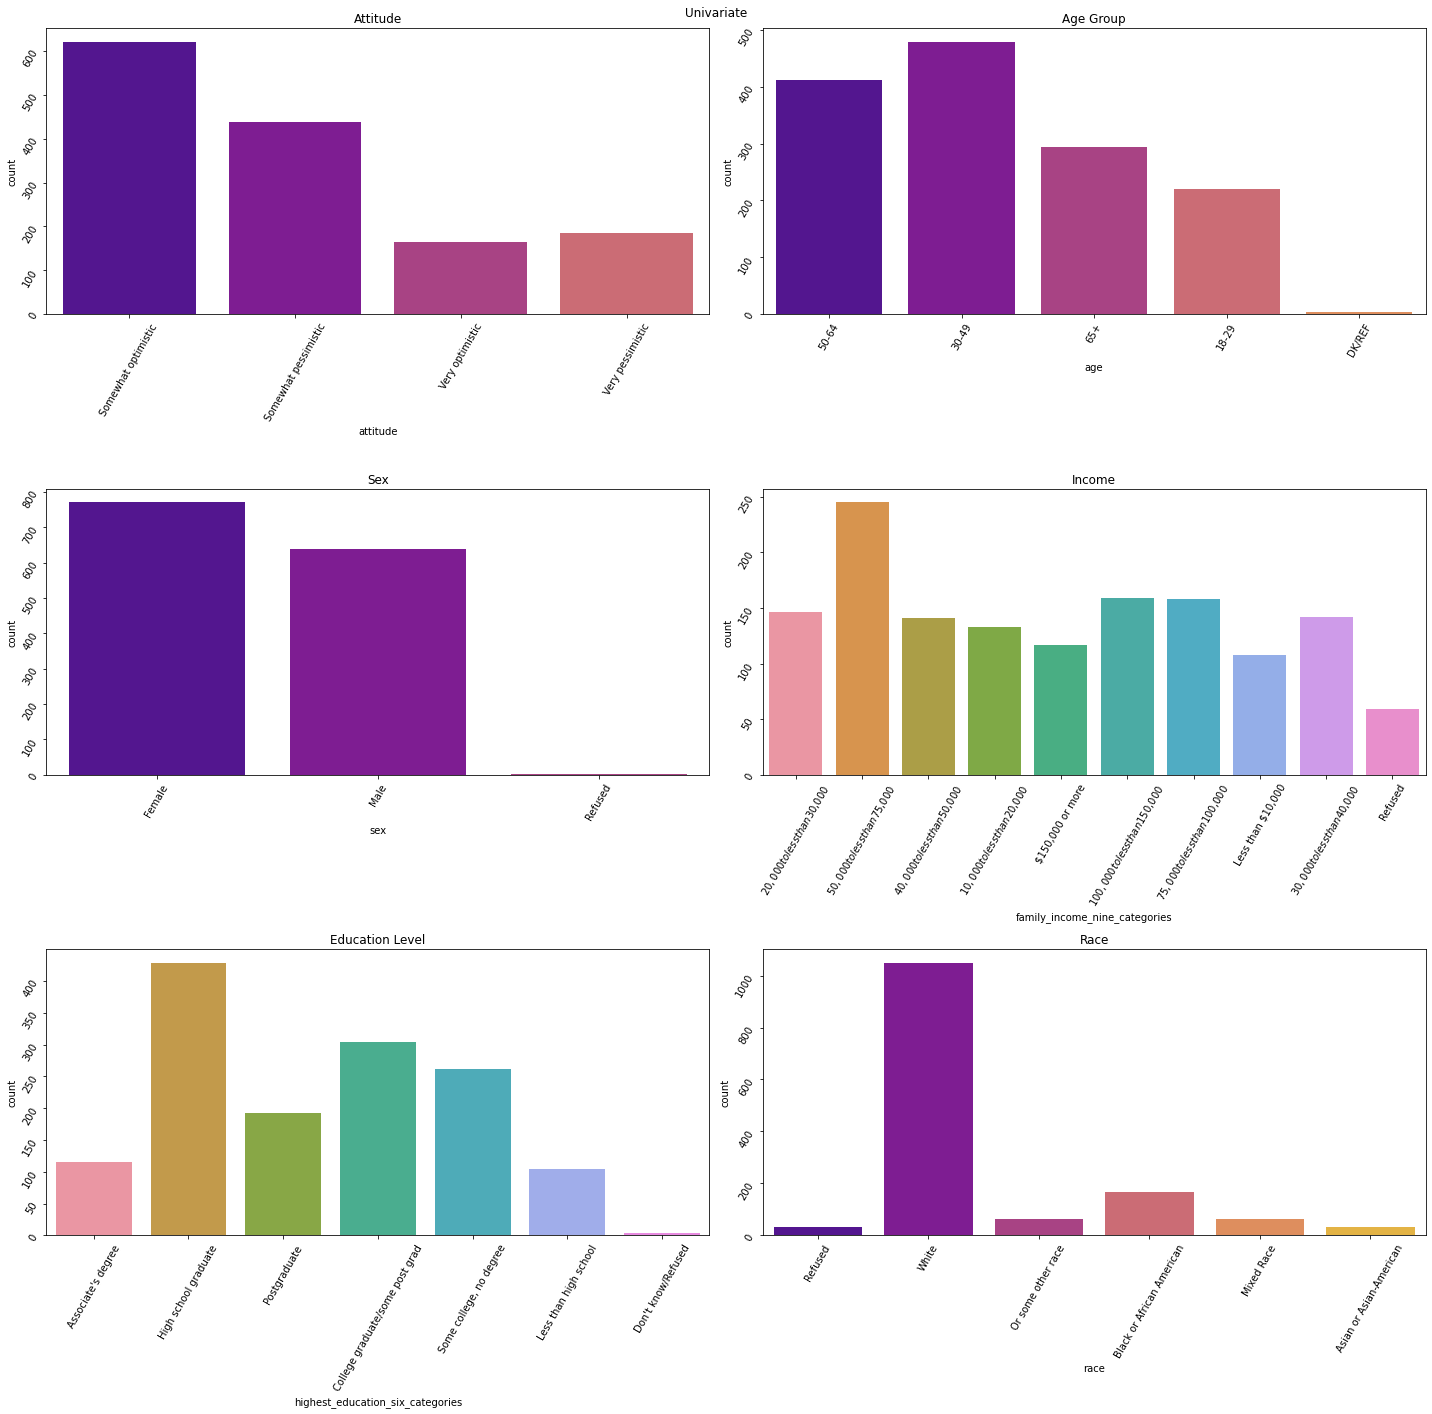

In [21]:
#for col in ['attitude', 'age', 'sex', 'education', 'income']:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=False, sharex=False,  figsize=(20,20))

# Set suptitle
fig.suptitle(f'Univariate')
#plt.xticks(rotation=45)

# First plot and its title
sns.countplot(data=train, x='attitude', ax=axes[0,0]).set_title('Attitude')
axes[0,0].tick_params(labelrotation=60)

# Second plot and its title
sns.countplot(data=train, x='age', ax=axes[0,1]).set_title('Age Group')
axes[0,1].tick_params(labelrotation=60)

# Third plot and its title
sns.countplot(data=train, x='sex', ax=axes[1,0]).set_title('Sex')
axes[1,0].tick_params(labelrotation=60)

# Fourth plot and its title
sns.countplot(data=train, x='family_income_nine_categories', ax=axes[1,1]).set_title('Income')
axes[1,1].tick_params(labelrotation=60)

# Fifth plot and its title
sns.countplot(data=train, x='highest_education_six_categories', ax=axes[2,0]).set_title('Education Level')
axes[2,0].tick_params(labelrotation=60)

# Sixth plot and its title
sns.countplot(data=train, x='race', ax=axes[2,1]).set_title('Race')
axes[2,1].tick_params(labelrotation=60)

plt.tight_layout()
plt.show()

---
---
---

In [22]:
train.attitude

1859     Somewhat optimistic
96      Somewhat pessimistic
420      Somewhat optimistic
1424     Somewhat optimistic
114     Somewhat pessimistic
                ...         
678     Somewhat pessimistic
957      Somewhat optimistic
239      Somewhat optimistic
1795     Somewhat optimistic
1297     Somewhat optimistic
Name: attitude, Length: 1408, dtype: object

In [23]:
pd.pivot_table(train, index='age', columns='attitude').pes_val

attitude  Somewhat optimistic  Somewhat pessimistic  Very optimistic  \
age                                                                    
18-29                     1.0                   2.0              0.0   
30-49                     1.0                   2.0              0.0   
50-64                     1.0                   2.0              0.0   
65+                       1.0                   2.0              0.0   
DK/REF                    NaN                   2.0              0.0   

attitude  Very pessimistic  
age                         
18-29                  3.0  
30-49                  3.0  
50-64                  3.0  
65+                    3.0  
DK/REF                 3.0

In [24]:
military=[]
[military.append(col) for col in df.columns if col.__contains__('military')]
military

['priority_reduce_military', 'priority_increase_military', 'military']

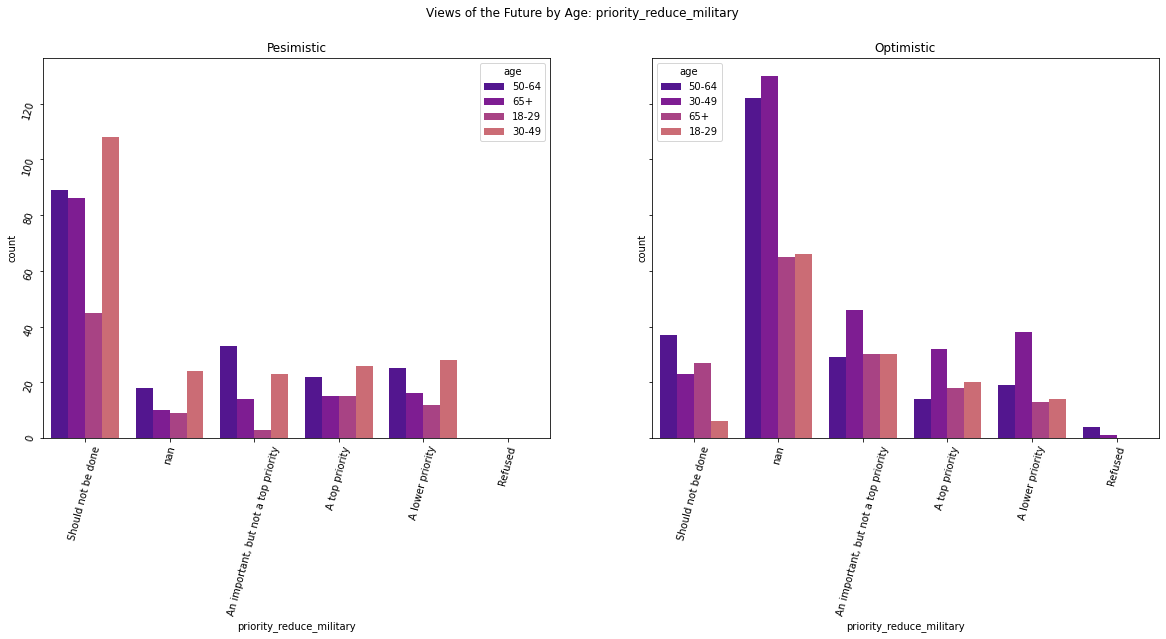

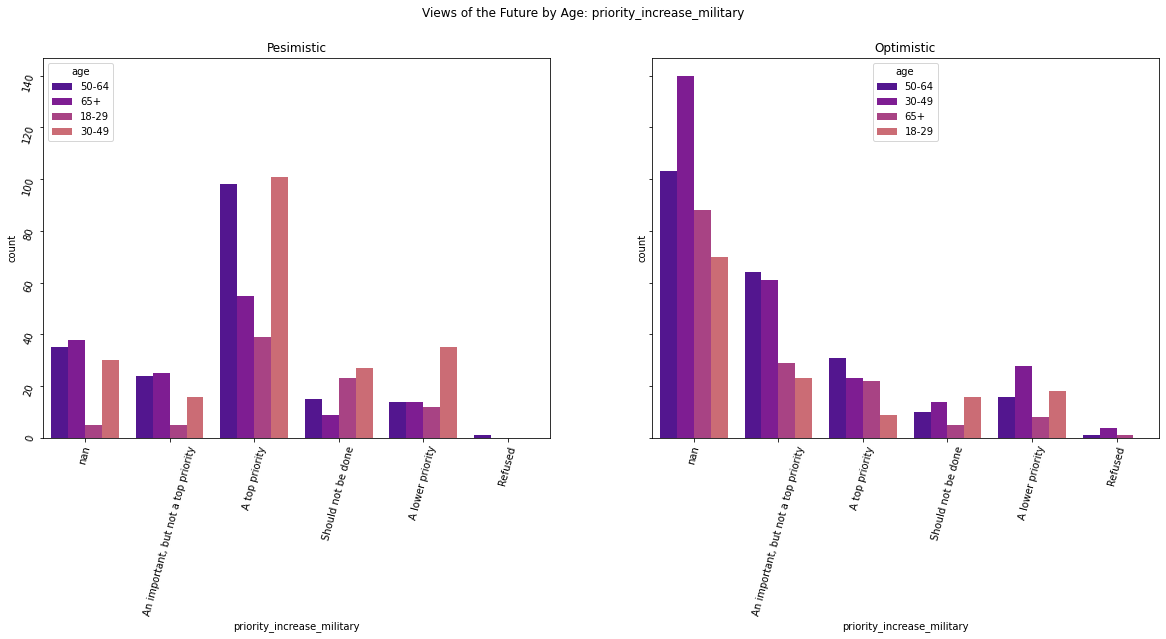

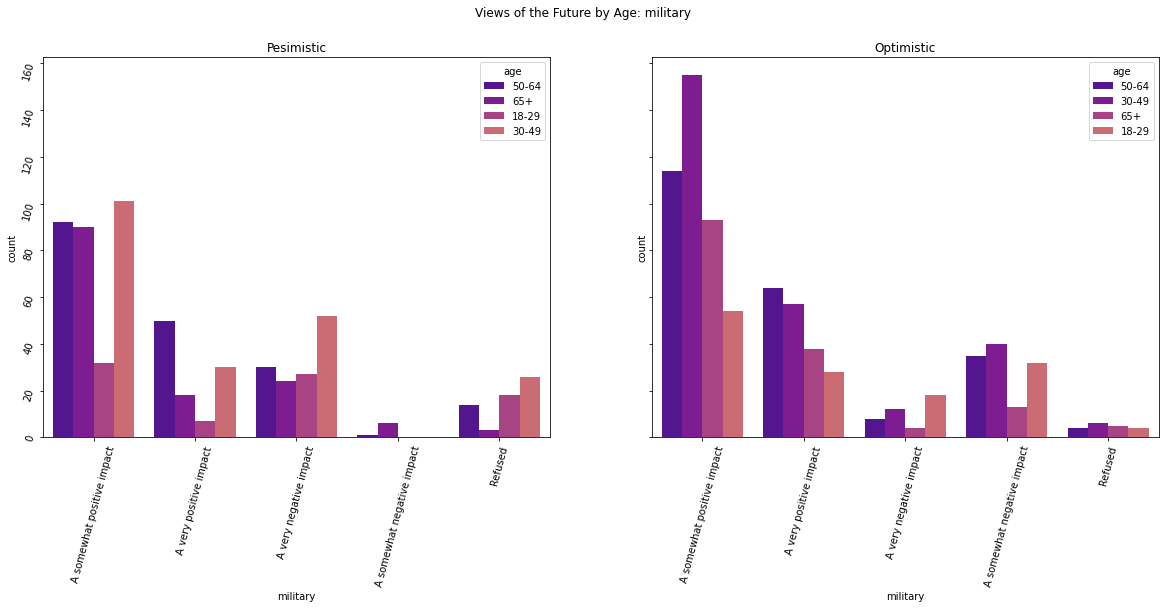

In [25]:
for col in military:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

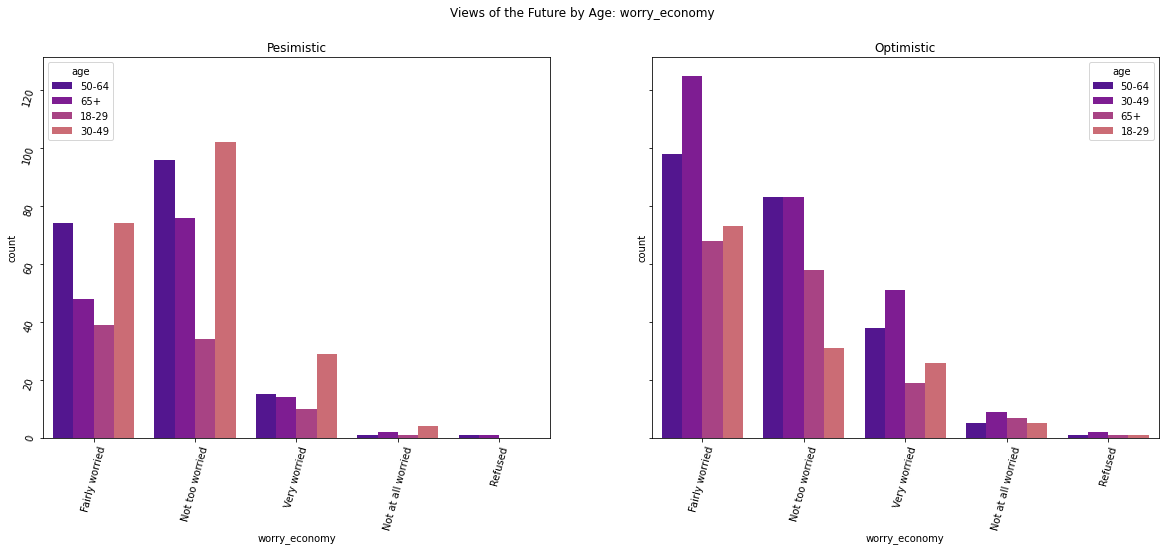

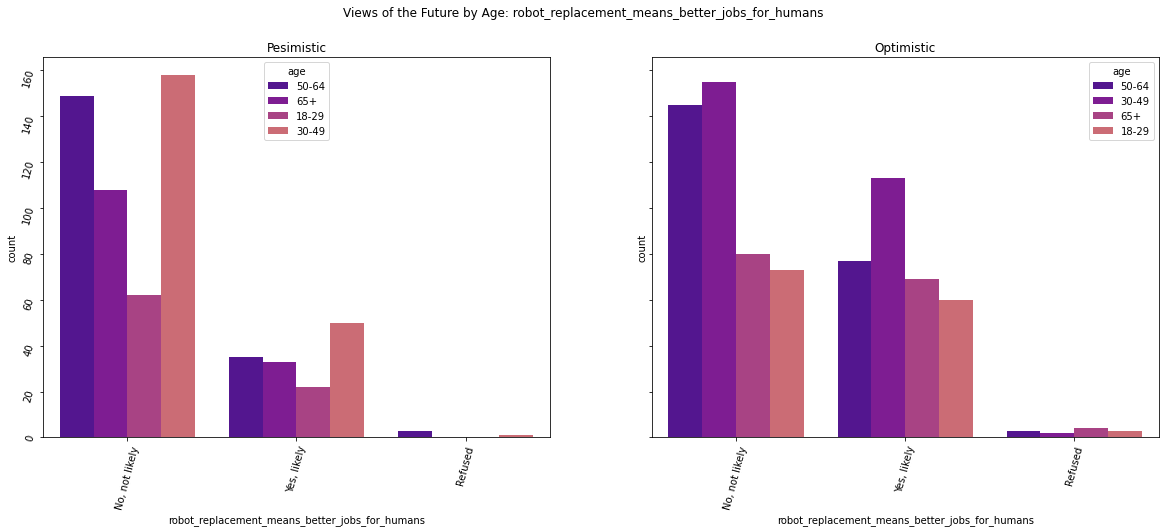

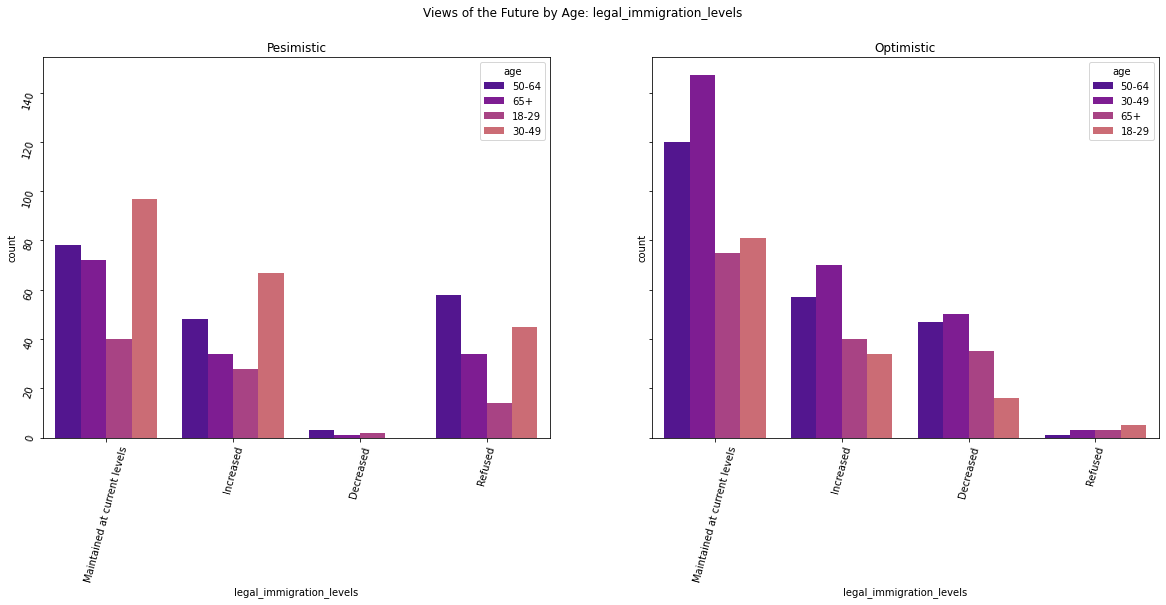

In [26]:
# Economy
# based off of question: contains section about economy
economy = ['worry_economy', 'robot_replacement_means_better_jobs_for_humans', 'legal_immigration_levels']
for col in economy:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

<AxesSubplot:xlabel='age'>

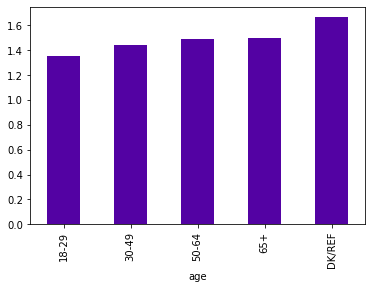

In [27]:
train.groupby('age').pes_val.mean().plot(kind='bar')

<AxesSubplot:xlabel='census_region'>

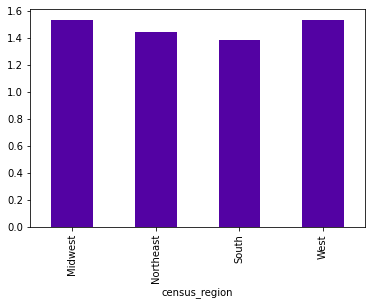

In [28]:
train.groupby('census_region').pes_val.mean().plot(kind='bar')

In [29]:
pd.pivot_table(data=train, index='age', values='is_pes', margins=True)

is_pes
age             
18-29   0.381818
30-49   0.436326
50-64   0.453883
65+     0.479592
DK/REF  0.666667
All     0.442472

In [30]:
pd.crosstab(index=[train.age, train.is_pes],
            columns=train.census_region,
            colnames=['Region'])

Region         Midwest  Northeast  South  West
age    is_pes                                 
18-29  0            28         19     56    33
       1            25         17     23    19
30-49  0            64         31    118    57
       1            50         34     77    48
50-64  0            48         47     91    39
       1            42         21     77    47
65+    0            33         26     66    28
       1            36         26     45    34
DK/REF 0             0          0      1     0
       1             0          0      2     0

In [31]:
df.columns[100:]

Index(['census_region', 'age', 'sex', 'highest_education_three_categories',
       'highest_education_six_categories', 'hispanic_or_latino', 'race',
       'race_and_ethnicity', 'birthplace', 'us_citizen', 'marital_status',
       'religion', 'evangelical_christian', 'church_attendance',
       'political_party_identity', 'political_party_lean',
       'summary_of_political_party_data', 'family_income_nine_categories',
       'family_income_three_categories', 'registered_to_vote',
       'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
       'pes_val', 'is_very_pes', 'is_very_opt'],
      dtype='object')

In [32]:
pd.crosstab(index=[train.age, train.is_pes],
            columns=train.political_party_identity,
            colnames=['Party'], normalize='index')

Party          Democrat  Independent   Refused  Republican  Something else
age    is_pes                                                             
18-29  0       0.330882     0.264706  0.022059    0.183824        0.198529
       1       0.357143     0.285714  0.035714    0.142857        0.178571
30-49  0       0.396296     0.222222  0.011111    0.240741        0.129630
       1       0.377990     0.244019  0.004785    0.210526        0.162679
50-64  0       0.395556     0.235556  0.017778    0.266667        0.084444
       1       0.379679     0.245989  0.010695    0.299465        0.064171
65+    0       0.307190     0.235294  0.013072    0.431373        0.013072
       1       0.312057     0.304965  0.000000    0.304965        0.078014
DK/REF 0       1.000000     0.000000  0.000000    0.000000        0.000000
       1       0.000000     0.500000  0.000000    0.500000        0.000000

In [33]:
df.political_party_identity.value_counts()

Democrat          911
Republican        679
Independent       602
Something else    294
Refused            29
Name: political_party_identity, dtype: int64

## Region

In [34]:
train.census_region.value_counts()

South        556
Midwest      326
West         305
Northeast    221
Name: census_region, dtype: int64

In [35]:
pd.crosstab(index=[train.census_region, train.is_pes],
            columns=train.political_party_identity,
            colnames=['Party'], normalize='columns')

Party                 Democrat  Independent   Refused  Republican  \
census_region is_pes                                                
Midwest       0       0.111111     0.105714  0.055556    0.145161   
              1       0.109162     0.088571  0.222222    0.115591   
Northeast     0       0.087719     0.074286  0.222222    0.096774   
              1       0.081871     0.091429  0.055556    0.043011   
South         0       0.249513     0.225714  0.222222    0.244624   
              1       0.144250     0.148571  0.000000    0.188172   
West          0       0.115010     0.122857  0.166667    0.094086   
              1       0.101365     0.142857  0.055556    0.072581   

Party                 Something else  
census_region is_pes                  
Midwest       0             0.154839  
              1             0.122581  
Northeast     0             0.077419  
              1             0.045161  
South         0             0.193548  
              1             0.180645  
West          0             0.109677  
              1             0.116129

In [36]:
pd.crosstab(index=[train.census_region, train.is_pes],
            columns=train.worry_economy,
            colnames=['Economy'], normalize='index')

Economy               Fairly worried  Not at all worried  Not too worried  \
census_region is_pes                                                        
Midwest       0             0.485549            0.023121         0.312139   
              1             0.509804            0.019608         0.065359   
Northeast     0             0.471545            0.024390         0.333333   
              1             0.551020            0.010204         0.091837   
South         0             0.442771            0.045181         0.322289   
              1             0.464286            0.008929         0.160714   
West          0             0.484076            0.025478         0.337580   
              1             0.486486            0.013514         0.094595   

Economy                Refused  Very worried  
census_region is_pes                          
Midwest       0       0.011561      0.167630  
              1       0.000000      0.405229  
Northeast     0       0.016260      0.154472  
              1       0.000000      0.346939  
South         0       0.000000      0.189759  
              1       0.004464      0.361607  
West          0       0.006369      0.146497  
              1       0.006757      0.398649

Whichever the region, the majority of people worry about the economy

In [37]:
pd.crosstab(index=[train.census_region, train.is_pes],
            columns=train.robot_replacement_means_better_jobs_for_humans,
            colnames=['Robots = Better Jobs'], margins=True)

Robots = Better Jobs  No, not likely  Refused  Yes, likely   All
census_region is_pes                                            
Midwest       0                  102        3           68   173
              1                  116        0           37   153
Northeast     0                   72        2           49   123
              1                   77        0           21    98
South         0                  200        3          129   332
              1                  164        3           57   224
West          0                   80        4           73   157
              1                  121        1           26   148
All                              932       16          460  1408

In [38]:
pd.crosstab(index=[train.census_region, train.is_pes],
            columns=train.legal_immigration_levels,
            colnames=['Immigration = Better Economy'], normalize='columns')

Immigration = Better Economy  Decreased  Increased  \
census_region is_pes                                 
Midwest       0                0.130000   0.105541   
              1                0.123333   0.118734   
Northeast     0                0.056667   0.076517   
              1                0.050000   0.092348   
South         0                0.213333   0.211082   
              1                0.220000   0.155673   
West          0                0.093333   0.137203   
              1                0.113333   0.102902   

Immigration = Better Economy  Maintained at current levels   Refused  
census_region is_pes                                                  
Midwest       0                                   0.123769  0.333333  
              1                                   0.097046  0.111111  
Northeast     0                                   0.104079  0.166667  
              1                                   0.067511  0.000000  
South         0                                   0.263010  0.055556  
              1                                   0.137834  0.055556  
West          0                                   0.105485  0.111111  
              1                                   0.101266  0.166667

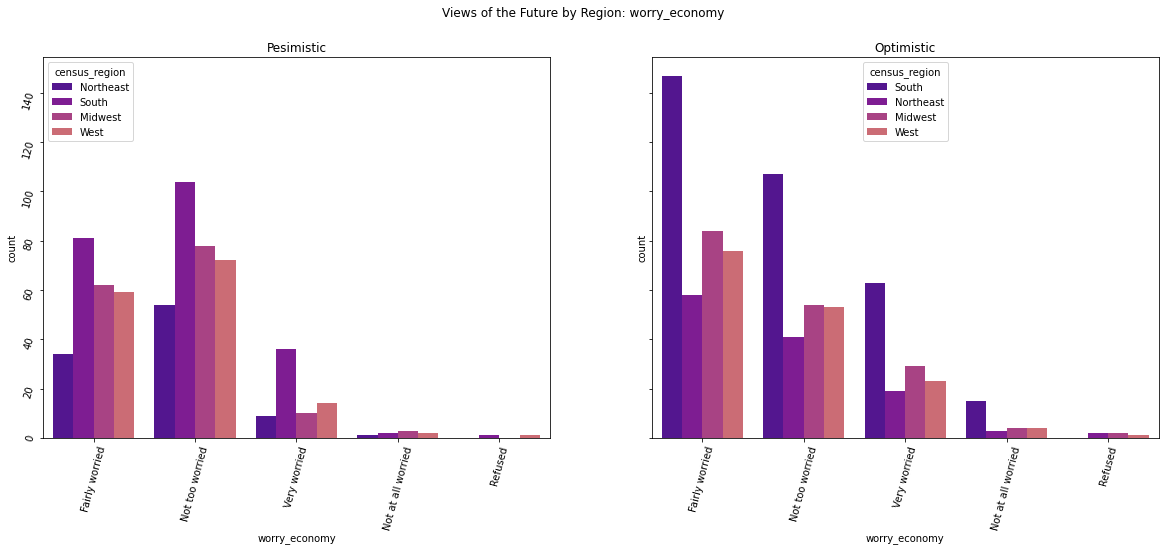

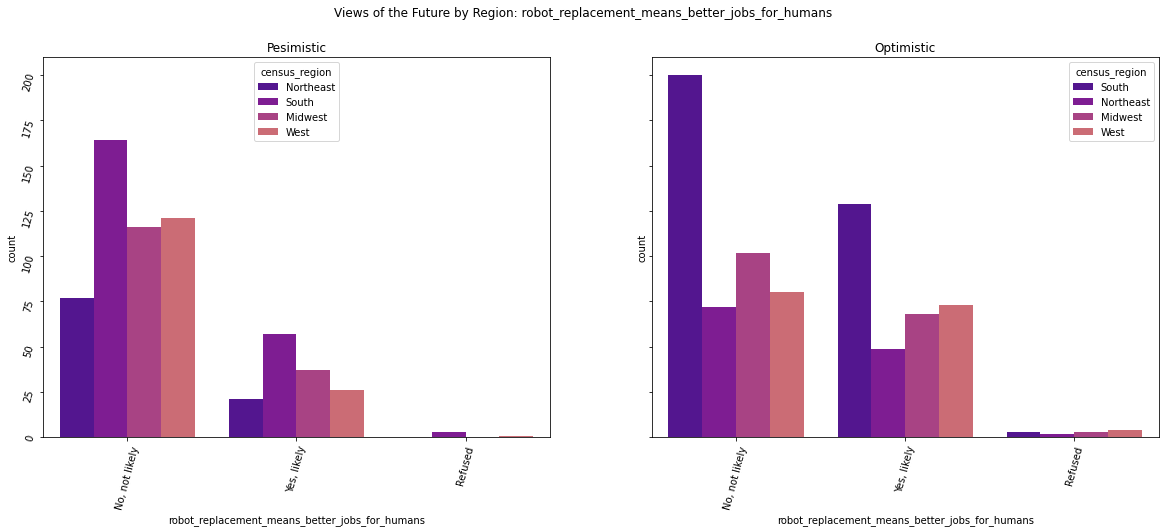

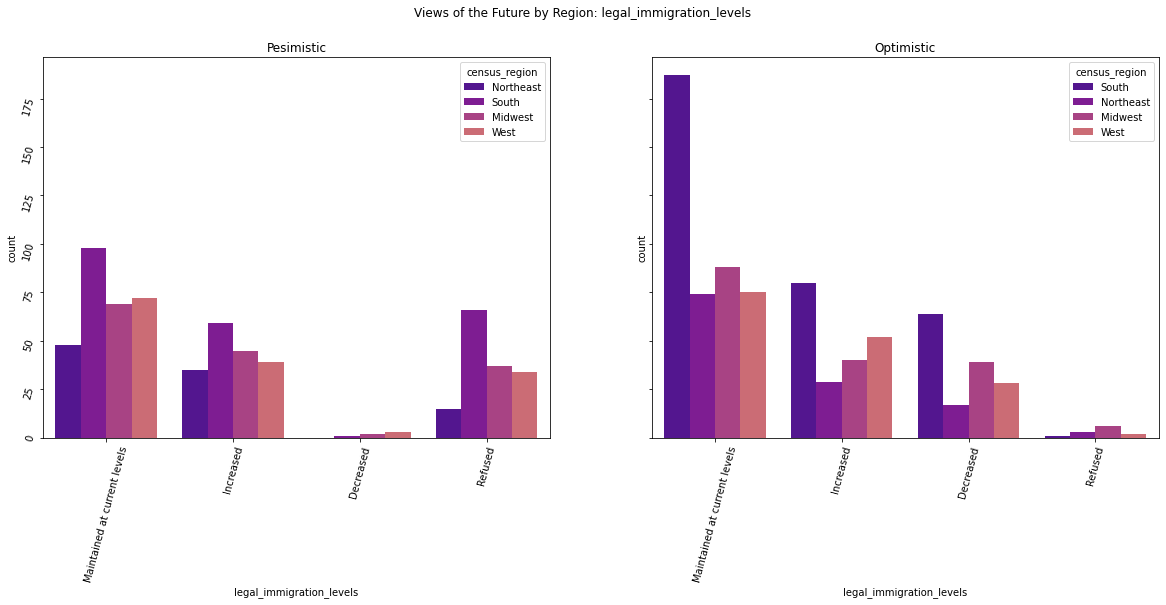

In [39]:
# Economy
# based off of question: contains section about economy
economy = ['worry_economy', 'robot_replacement_means_better_jobs_for_humans', 'legal_immigration_levels']
for col in economy:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Region: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1)], x= col, ax=axes[0], hue='census_region')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0)], x= col, ax=axes[1], hue='census_region')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

In [40]:
df.columns[100:]

Index(['census_region', 'age', 'sex', 'highest_education_three_categories',
       'highest_education_six_categories', 'hispanic_or_latino', 'race',
       'race_and_ethnicity', 'birthplace', 'us_citizen', 'marital_status',
       'religion', 'evangelical_christian', 'church_attendance',
       'political_party_identity', 'political_party_lean',
       'summary_of_political_party_data', 'family_income_nine_categories',
       'family_income_three_categories', 'registered_to_vote',
       'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
       'pes_val', 'is_very_pes', 'is_very_opt'],
      dtype='object')

In [41]:
for region in df.census_region.unique():
    print(region)
    print(train[train.census_region==region]['highest_education_six_categories'].value_counts())
    print('-----------------')

Northeast
High school graduate               68
College graduate/some post grad    54
Postgraduate                       40
Some college, no degree            37
Associate's degree                 12
Less than high school               9
Don't know/Refused                  1
Name: highest_education_six_categories, dtype: int64
-----------------
South
High school graduate               171
College graduate/some post grad    112
Some college, no degree             98
Postgraduate                        74
Less than high school               53
Associate's degree                  46
Don't know/Refused                   2
Name: highest_education_six_categories, dtype: int64
-----------------
Midwest
High school graduate               112
Some college, no degree             59
College graduate/some post grad     55
Postgraduate                        44
Associate's degree                  34
Less than high school               22
Name: highest_education_six_categories, dtype: int64
--------

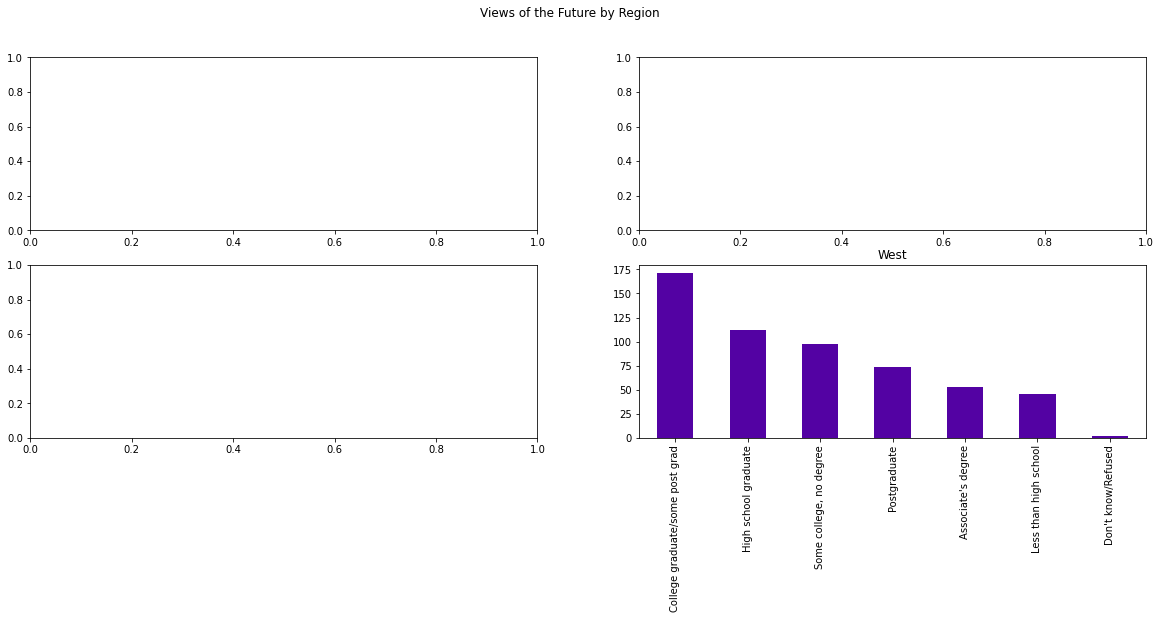

In [42]:
# Economy
# based off of question: contains section about economy
# economy = ['worry_economy', 'robot_replacement_means_better_jobs_for_humans', 'legal_immigration_levels']

# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=False, sharex=False,  figsize=(20,7))

# Set suptitle
fig.suptitle(f'Views of the Future by Region')
#plt.xticks(rotation=45)

# First plot and its title
axes[0,0]=train[train.census_region=='South']['highest_education_six_categories'].value_counts().plot(kind='bar').set_title('South')
#ax1.tick_params(labelrotation=75)

# Second plot and its title
axes[0,1]=train[train.census_region=='Northeast']['highest_education_six_categories'].value_counts().plot(kind='bar').set_title('Northeast')
#ax2 = tick_params(labelrotation=75)

# Third plot and its title
axes[1,0]=train[train.census_region=='Midwest']['highest_education_six_categories'].value_counts().plot(kind='bar').set_title('Midwest')
#ax2.tick_params(labelrotation=75)

# Fourth plot and its title
axes[1,1]=train[train.census_region=='West']['highest_education_six_categories'].value_counts().plot(kind='bar').set_title('West')
#ax3.tick_params(labelrotation=75)

South        556
Midwest      326
West         305
Northeast    221
Name: census_region, dtype: int64


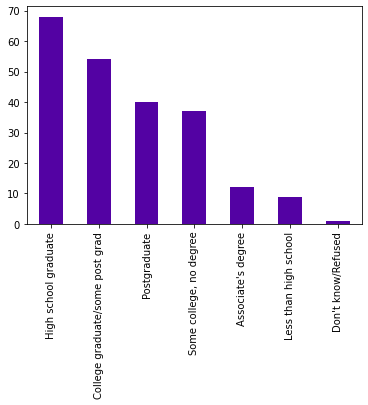

In [43]:
train[train.census_region=='Northeast']['highest_education_six_categories'].value_counts().plot(kind='bar')
print(train.census_region.value_counts())

<AxesSubplot:>

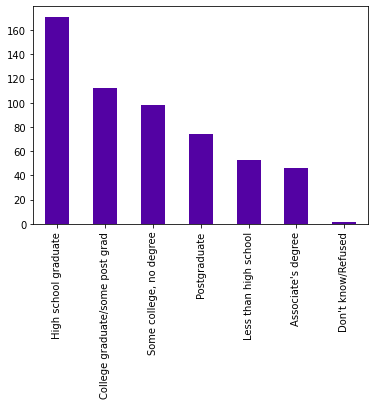

In [44]:
train[train.census_region=='South']['highest_education_six_categories'].value_counts().plot(kind='bar')

<AxesSubplot:>

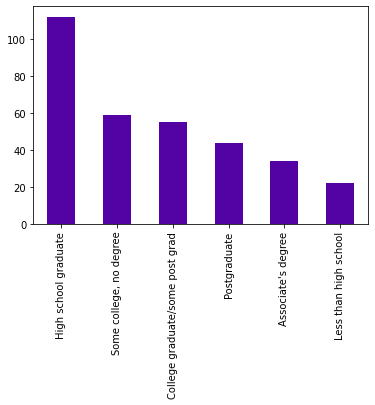

In [45]:
train[train.census_region=='Midwest']['highest_education_six_categories'].value_counts().plot(kind='bar')

In [46]:
most_freq=[]

In [47]:
for region in train.census_region.unique():
    for col in train.drop(columns=['census_region']).columns:
        most_freq.append(train[train==region][col].value_counts()[:1].index)

<AxesSubplot:>

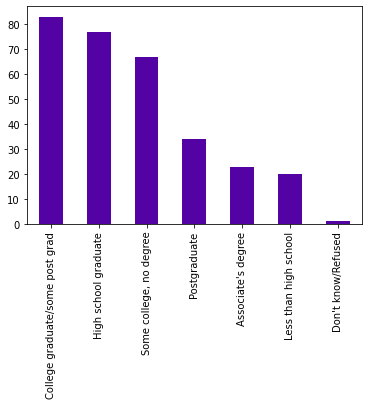

In [48]:
train[train.census_region=='West']['highest_education_six_categories'].value_counts().plot(kind='bar')

In [49]:
train.form.value_counts().mode()

0    695
1    713
dtype: int64

In [50]:
train.form.value_counts()[:1].index.tolist()

['Form 2']

In [51]:
train.is_pes.value_counts()

0    785
1    623
Name: is_pes, dtype: int64

In [52]:
pes_df = train[train.is_pes==1].drop(columns=['qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude'])

for col in pes_df:
    if pes_df[col].value_counts()[0] > (len(pes_df) * .70):
        print(pes_df[col].value_counts())
        print()
        print('|-----------|')

English    617
Spanish      6
Name: language, dtype: int64

|-----------|
Get worse              463
Stay about the same    131
Get better              26
Refused                  3
Name: avg_family, dtype: int64

|-----------|
The U.S. economy will be WEAKER      490
The U.S. economy will be STRONGER     84
Refused                               49
Name: happen_general, dtype: int64

|-----------|
Health care will be LESS affordable    465
Health care will be MORE affordable    115
Refused                                 43
Name: happen_health, dtype: int64

|-----------|
The U.S. will be LESS important in the world    486
The U.S. will be MORE important in the world     94
Refused                                          43
Name: happen_usa, dtype: int64

|-----------|
The gap between the rich and the poor will GROW           537
The gap between the rich and the poor will GET SMALLER     58
Refused                                                    28
Name: happen_wealthgap, dtype: in

In [53]:
opt_df = train[train.is_pes==0].drop(columns=['qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude'])
for col in opt_df:
    if opt_df[col].value_counts()[0] > (len(pes_df) * .70):
        print(opt_df[col].value_counts())
        print()
        print('|-----------|')

Mobile phone    447
Desktop         246
Tablet           92
Name: device_type, dtype: int64

|-----------|
English    768
Spanish     17
Name: language, dtype: int64

|-----------|
The U.S. economy will be STRONGER    453
The U.S. economy will be WEAKER      264
Refused                               68
Name: happen_general, dtype: int64

|-----------|
Race relations will IMPROVE      504
Race relations will GET WORSE    204
Refused                           77
Name: happen_race, dtype: int64

|-----------|
The gap between the rich and the poor will GROW           503
The gap between the rich and the poor will GET SMALLER    205
Refused                                                    77
Name: happen_wealthgap, dtype: int64

|-----------|
Will probably happen          438
Will definitely happen        248
Will probably not happen       78
Will definitely not happen     16
Refused                         5
Name: happen_female_pres, dtype: int64

|-----------|
Will probably not happen  

In [54]:
opt_df.happen_wealthgap.value_counts()

The gap between the rich and the poor will GROW           503
The gap between the rich and the poor will GET SMALLER    205
Refused                                                    77
Name: happen_wealthgap, dtype: int64

In [55]:
pes_df.happen_wealthgap.value_counts()

The gap between the rich and the poor will GROW           537
The gap between the rich and the poor will GET SMALLER     58
Refused                                                    28
Name: happen_wealthgap, dtype: int64

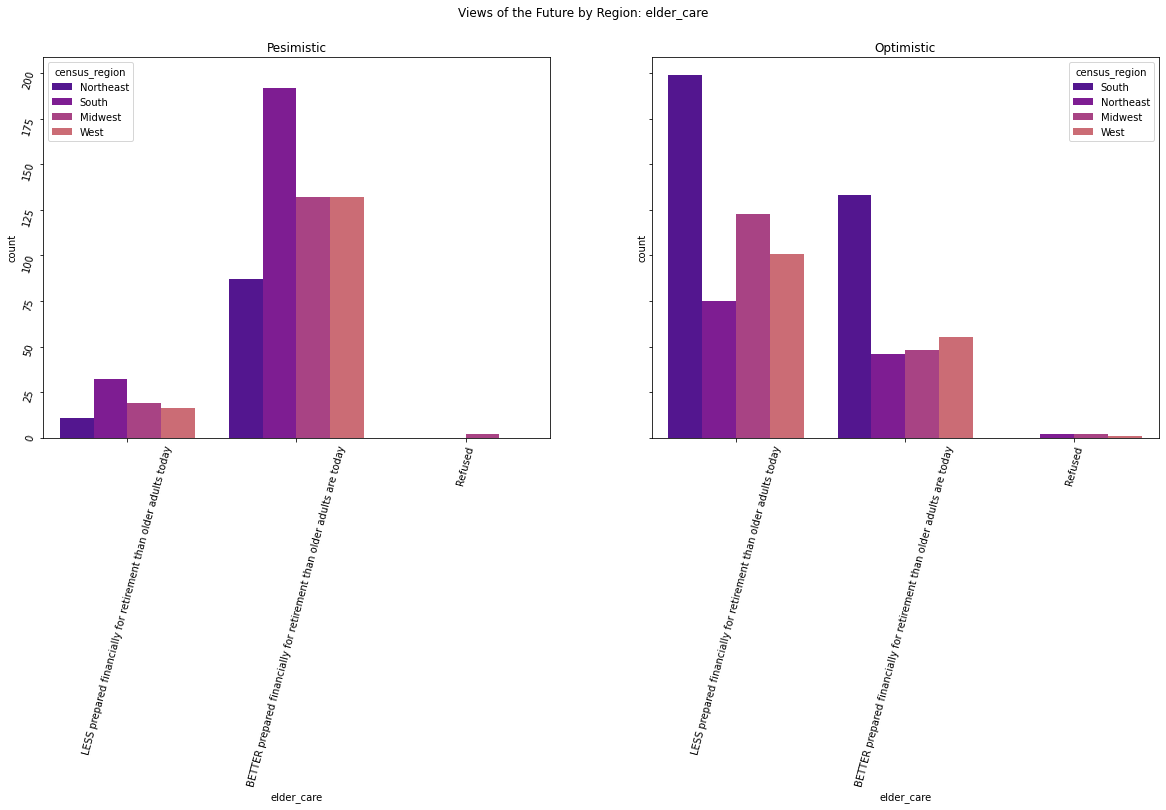

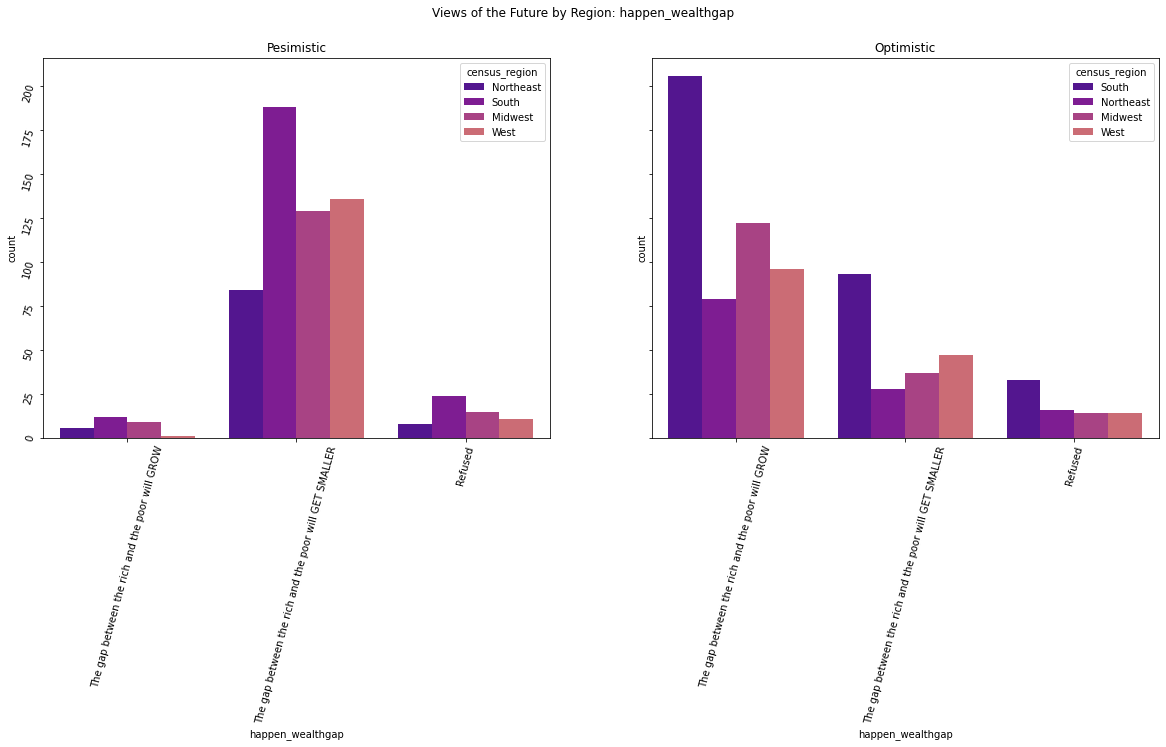

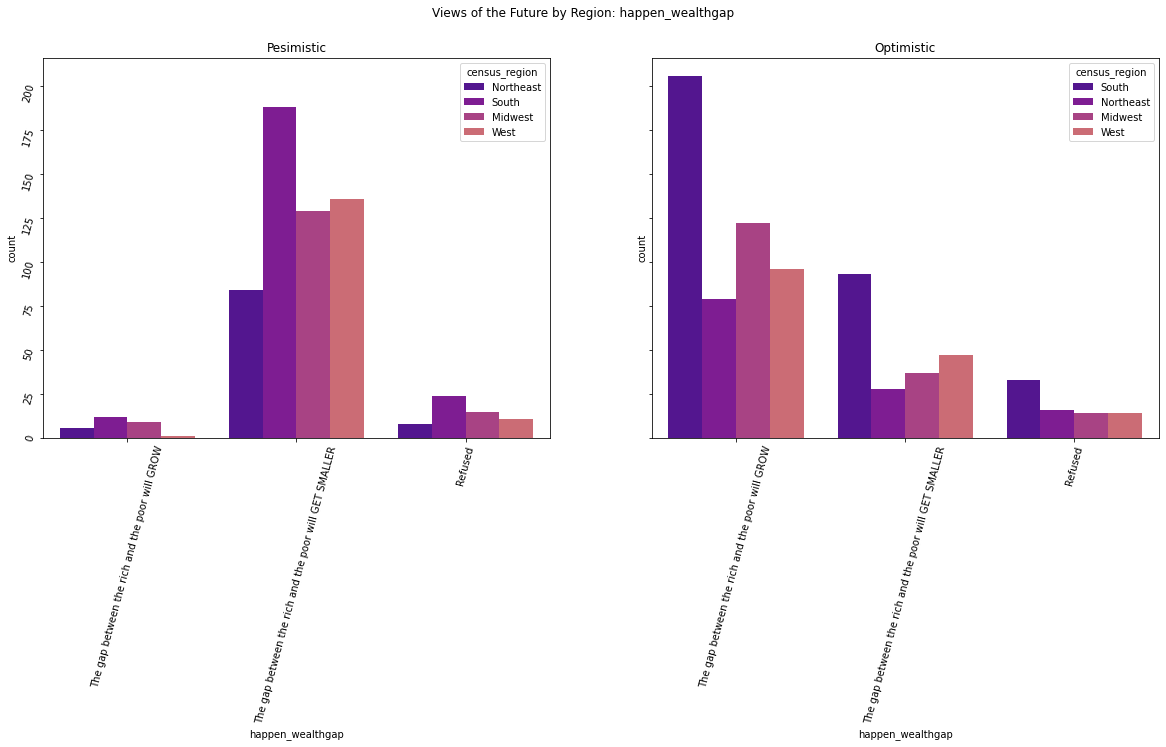

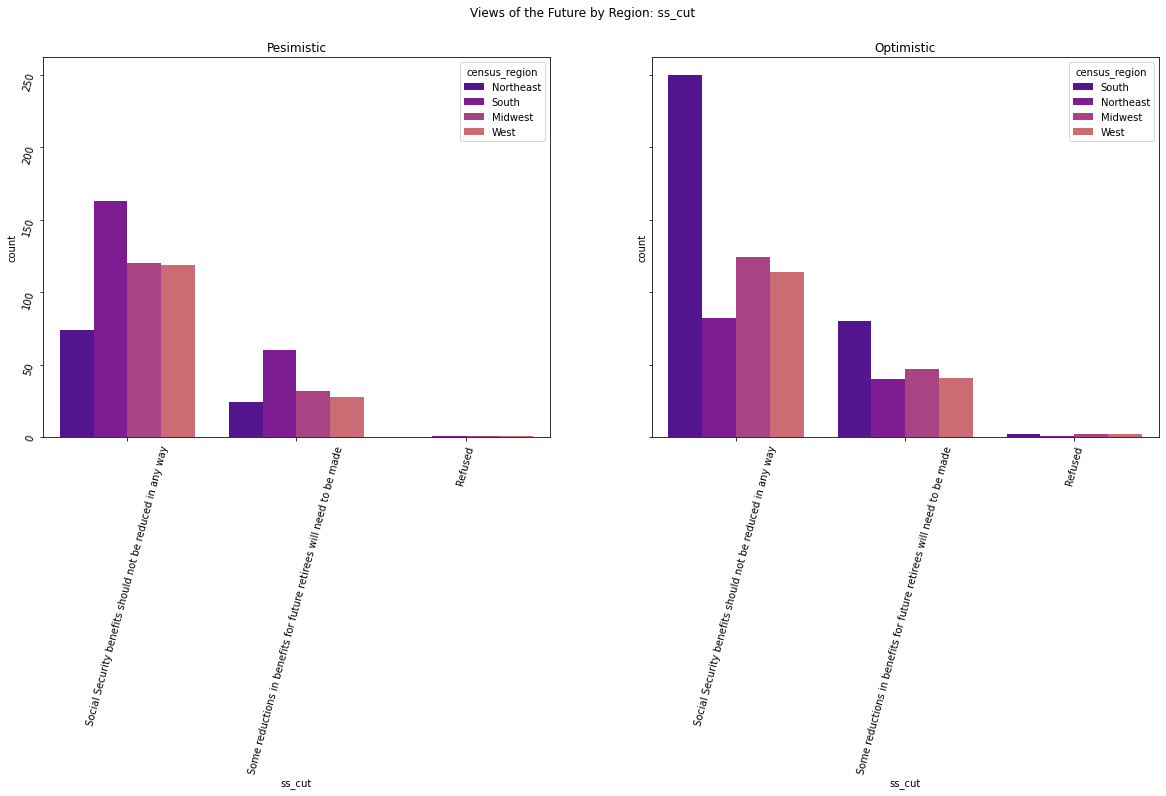

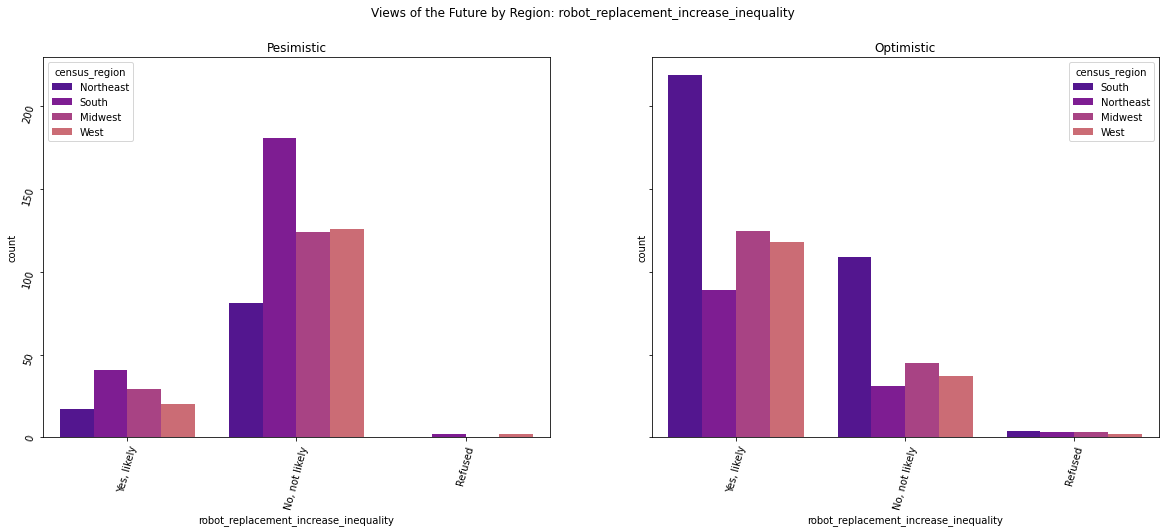

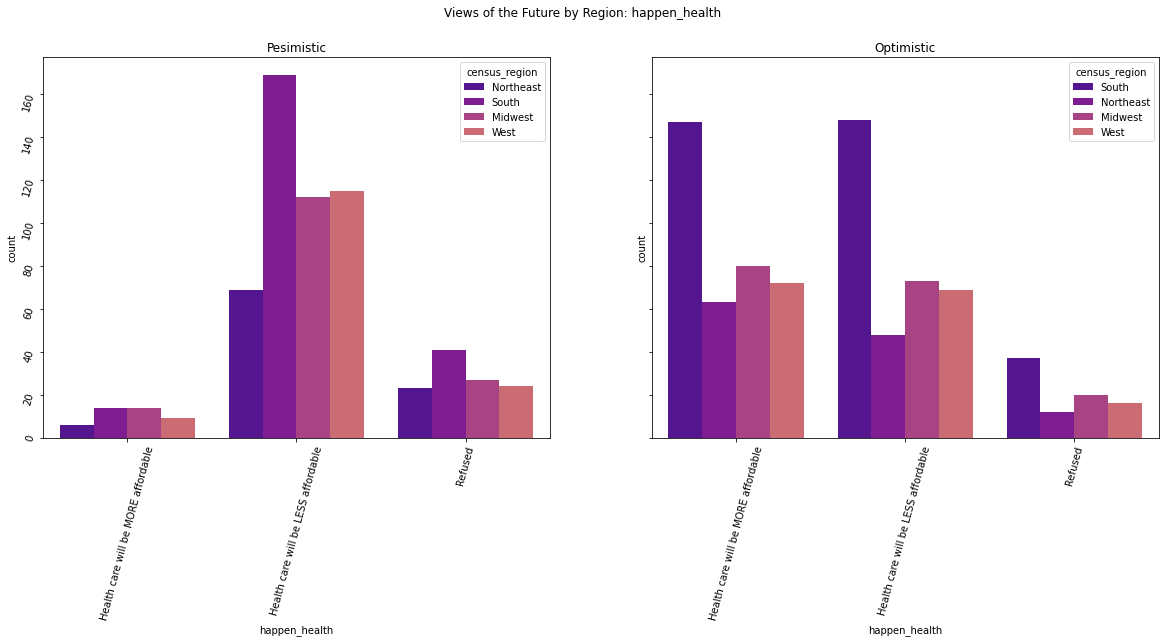

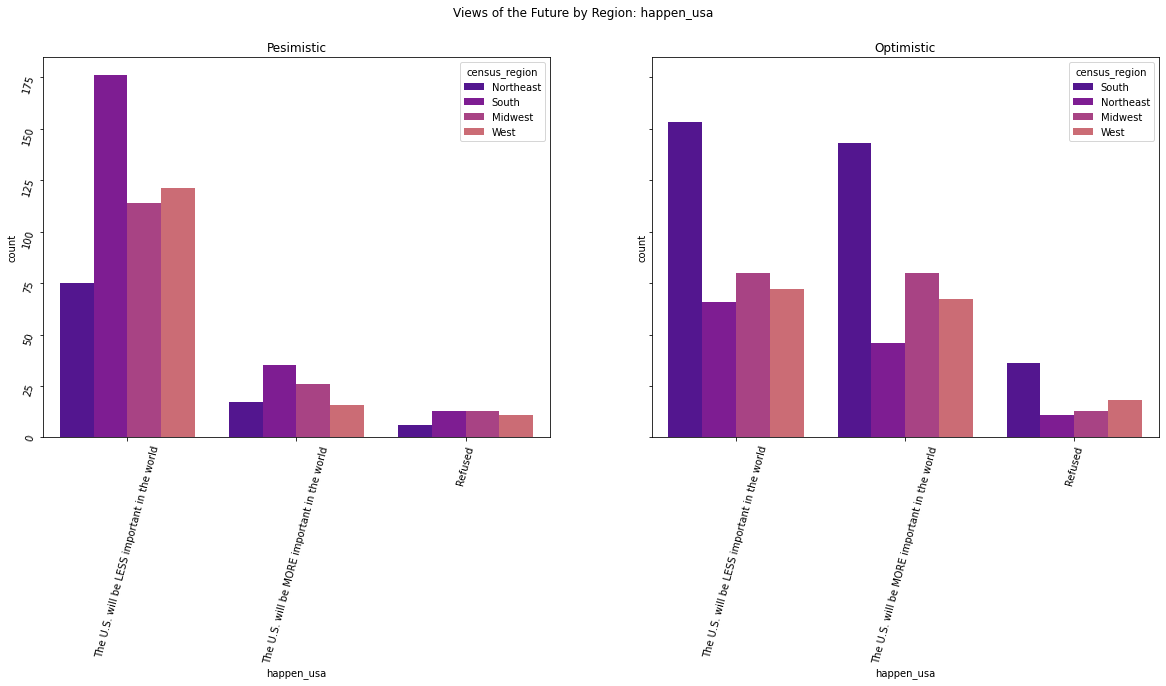

In [56]:
# Economy
# based off of question: contains section about economy
cat_list = ['elder_care', 'happen_wealthgap', 'happen_wealthgap', 'ss_cut', 'robot_replacement_increase_inequality', 'happen_health', 'happen_usa']
for col in cat_list:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Region: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1)], x= col, ax=axes[0], hue='census_region')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0)], x= col, ax=axes[1], hue='census_region')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

In [57]:
train.device_type.unique()

array(['Mobile phone', 'Desktop', 'Tablet'], dtype=object)

<AxesSubplot:xlabel='age', ylabel='count'>

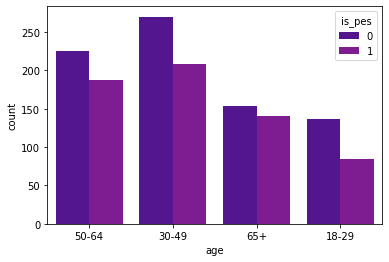

In [58]:
sns.countplot(data=train[train.age!='DK/REF'], x='age', hue='is_pes')

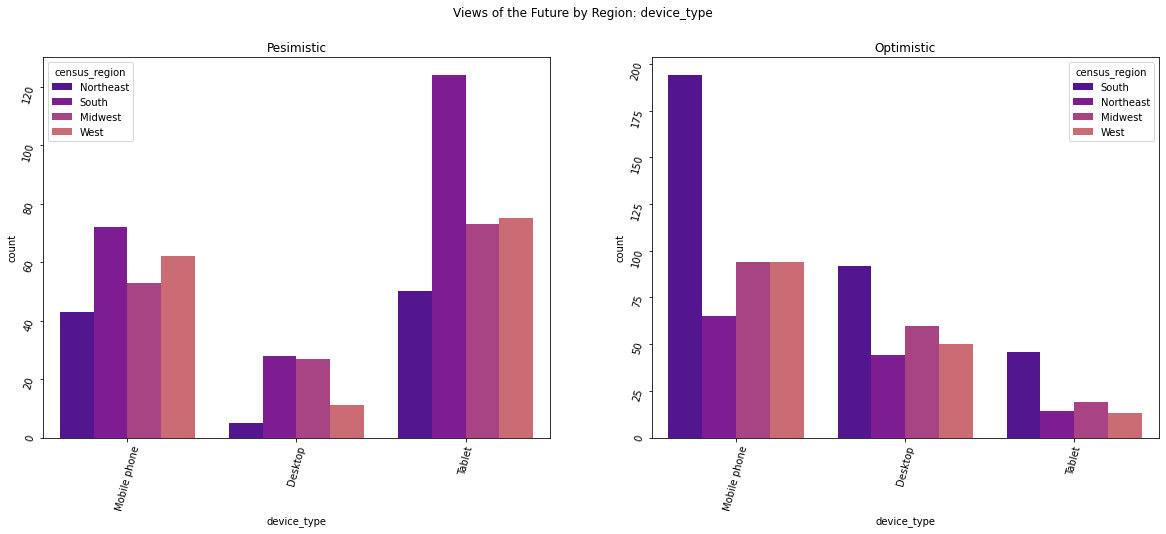

In [59]:
for col in ['device_type']:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Region: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1)], x= col, ax=axes[0], hue='census_region')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0)], x= col, ax=axes[1], hue='census_region')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

In [60]:
young_df = train[(train.age=='30-49') | (train.age=='18-29')].drop(columns=['qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude'])

for col in young_df:
    if young_df[col].value_counts()[0] > (len(young_df) * .70):
        print(young_df[col].value_counts())
        print()
        print('|-----------|')

Mobile phone    492
Desktop         183
Tablet           24
Name: device_type, dtype: int64

|-----------|
English    685
Spanish     14
Name: language, dtype: int64

|-----------|
The gap between the rich and the poor will GROW           511
The gap between the rich and the poor will GET SMALLER    125
Refused                                                    63
Name: happen_wealthgap, dtype: int64

|-----------|
LESS prepared financially for retirement than older adults today          520
BETTER prepared financially for retirement than older adults are today    177
Refused                                                                     2
Name: elder_care, dtype: int64

|-----------|
Yes, likely       527
No, not likely    163
Refused             9
Name: robot_replacement_increase_inequality, dtype: int64

|-----------|
Metropolitan        592
Non-metropolitan    107
Name: metro, dtype: int64

|-----------|
No         553
Yes        141
Refused      5
Name: hispanic_or_latino, dt

In [62]:
old_df = train[(train.age=='50-64') | (train.age=='65+')].drop(columns=['language', 'birthplace', 'qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude'])

for col in old_df:
    if old_df[col].value_counts()[0] > (len(old_df) * .70):
        print(old_df[col].value_counts())
        print()
        print('|-----------|')

The gap between the rich and the poor will GROW           527
The gap between the rich and the poor will GET SMALLER    137
Refused                                                    42
Name: happen_wealthgap, dtype: int64

|-----------|
LESS prepared financially for retirement than older adults today          519
BETTER prepared financially for retirement than older adults are today    182
Refused                                                                     5
Name: elder_care, dtype: int64

|-----------|
Yes, likely       534
No, not likely    165
Refused             7
Name: robot_replacement_increase_inequality, dtype: int64

|-----------|
Social Security benefits should not be reduced in any way               560
Some reductions in benefits for future retirees will need to be made    142
Refused                                                                   4
Name: ss_cut, dtype: int64

|-----------|
Metropolitan        585
Non-metropolitan    121
Name: metro, dtype: int64

In [63]:
train.census_region.value_counts()

South        556
Midwest      326
West         305
Northeast    221
Name: census_region, dtype: int64

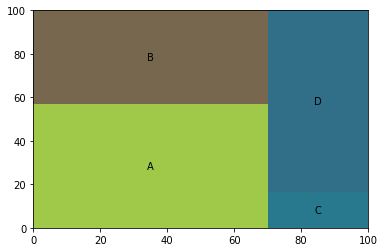

In [64]:
import squarify
sizes = [40, 30, 5, 25]
label=['A', 'B', 'C', 'D']
squarify.plot(sizes)
squarify.plot(sizes=sizes, label=label, alpha=0.6 )
plt.show()

In [65]:
d = train.groupby('age')['priority_increase_military'].count().reset_index().priority_increase_military.values.tolist()
d

[220, 479, 412, 294, 3]

In [66]:
train.groupby('age')['priority_increase_military'].unique()

age
18-29     [nan, An important, but not a top priority, A ...
30-49     [An important, but not a top priority, A top p...
50-64     [nan, An important, but not a top priority, A ...
65+       [A top priority, nan, A lower priority, An imp...
DK/REF                                [A top priority, nan]
Name: priority_increase_military, dtype: object

In [67]:
a = train.groupby('age')['priority_increase_military'].unique().tolist()
a

[array(['nan', 'An important, but not a top priority', 'A lower priority',
        'Should not be done', 'A top priority'], dtype=object),
 array(['An important, but not a top priority', 'A top priority', 'nan',
        'Should not be done', 'A lower priority', 'Refused'], dtype=object),
 array(['nan', 'An important, but not a top priority', 'A top priority',
        'Should not be done', 'A lower priority', 'Refused'], dtype=object),
 array(['A top priority', 'nan', 'A lower priority',
        'An important, but not a top priority', 'Should not be done',
        'Refused'], dtype=object),
 array(['A top priority', 'nan'], dtype=object)]

In [68]:
train.age.unique()

array(['50-64', '30-49', '65+', '18-29', 'DK/REF'], dtype=object)

In [69]:
train[['age', '49_or_younger']]

KeyError: "['49_or_younger'] not in index"

In [70]:
train.age.isin(['30-49', '18-29'])

1859    False
96      False
420      True
1424     True
114     False
        ...  
678     False
957     False
239      True
1795     True
1297     True
Name: age, Length: 1408, dtype: bool

<AxesSubplot:xlabel='age', ylabel='count'>

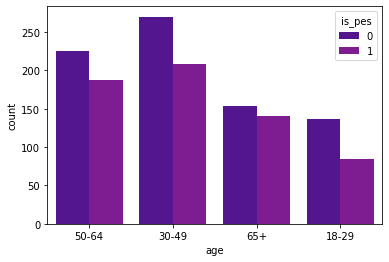

In [71]:
sns.countplot(data=train[train.age!='DK/REF'], x='age', hue='is_pes')

In [72]:
train.happen_race

1859      Race relations will IMPROVE
96                            Refused
420     Race relations will GET WORSE
1424    Race relations will GET WORSE
114       Race relations will IMPROVE
                    ...              
678       Race relations will IMPROVE
957       Race relations will IMPROVE
239     Race relations will GET WORSE
1795                          Refused
1297      Race relations will IMPROVE
Name: happen_race, Length: 1408, dtype: object

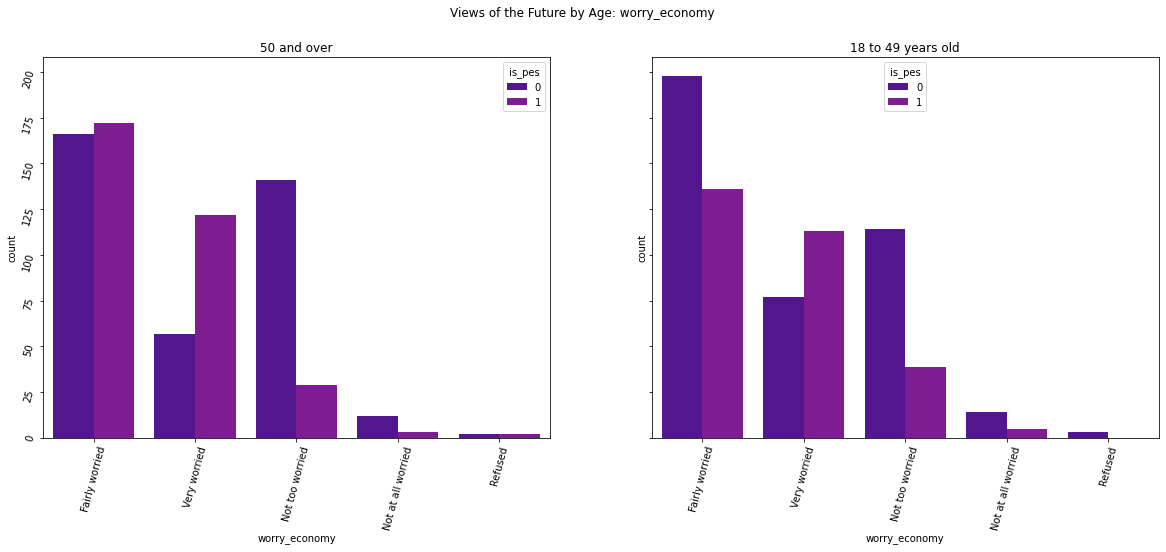

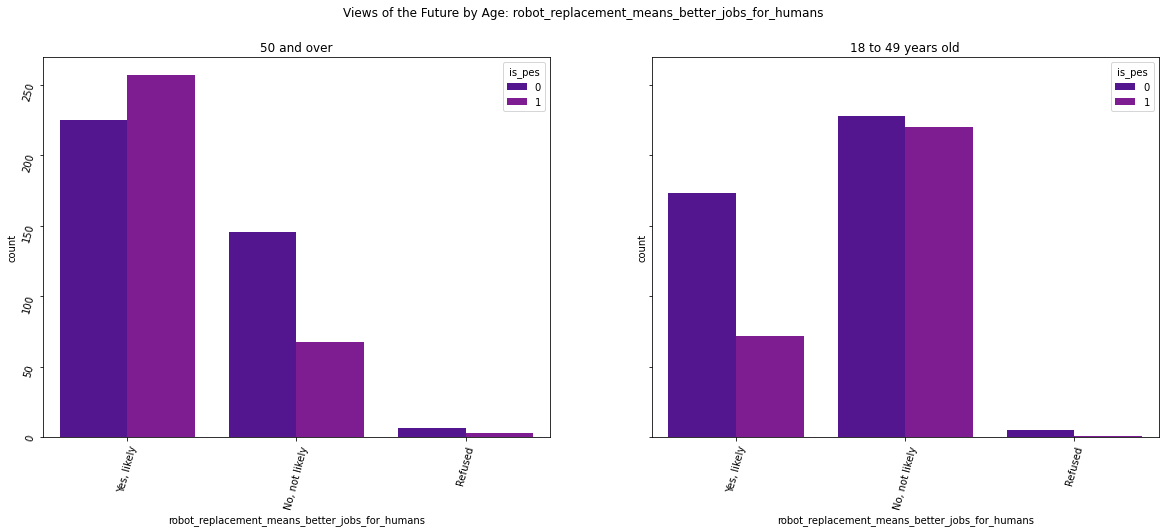

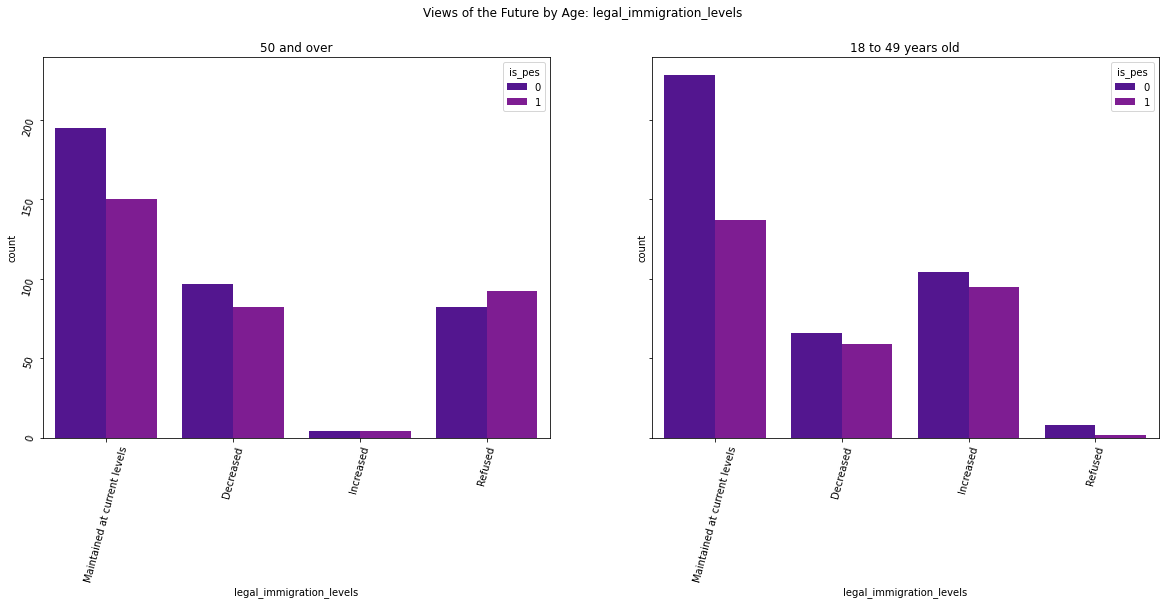

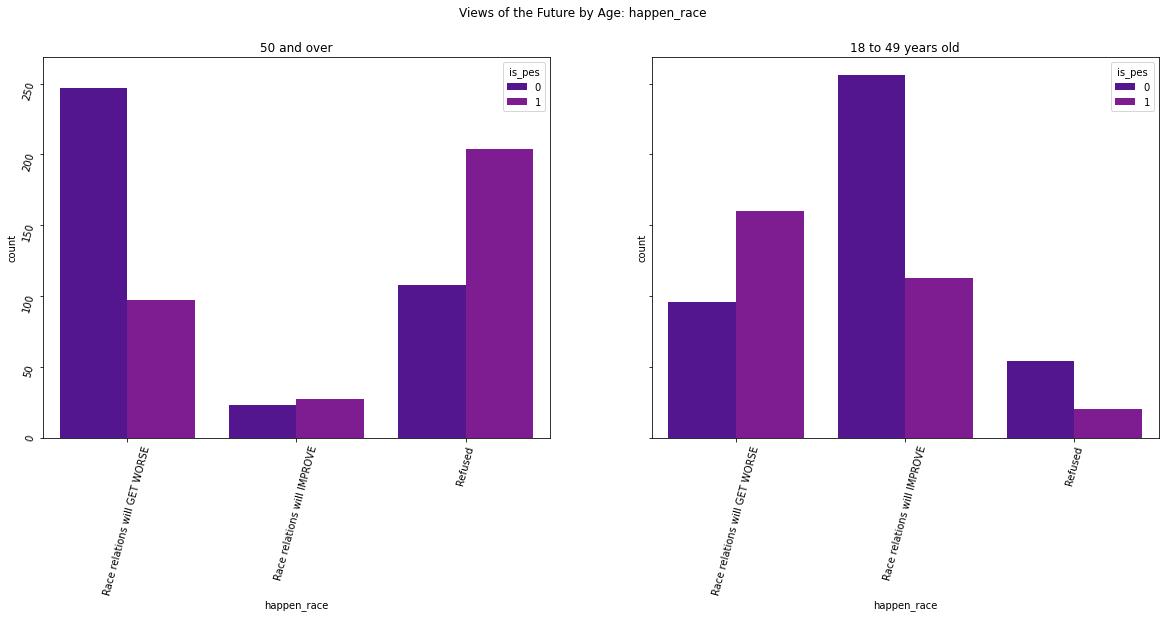

In [73]:
# Economy
# based off of question: contains section about economy
economy = ['worry_economy', 'robot_replacement_means_better_jobs_for_humans', 'legal_immigration_levels', 'happen_race']
for col in economy:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.age=='50-64') | (train.age=='65+') & (train.age!='DK/REF')], x= col, ax=axes[0], hue='is_pes')
    axes[0].set_title('50 and over')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.age=='18-29') | (train.age=='30-49') & (train.age!='DK/REF')], x= col, ax=axes[1], hue='is_pes')
    axes[1].set_title('18 to 49 years old')
    axes[1].tick_params(labelrotation=75)

In [74]:
pd.crosstab(index=[train.age, train.is_pes],
            columns=train.census_region,
            colnames=['Region'])

Region         Midwest  Northeast  South  West
age    is_pes                                 
18-29  0            28         19     56    33
       1            25         17     23    19
30-49  0            64         31    118    57
       1            50         34     77    48
50-64  0            48         47     91    39
       1            42         21     77    47
65+    0            33         26     66    28
       1            36         26     45    34
DK/REF 0             0          0      1     0
       1             0          0      2     0

In [75]:
pd.crosstab(index=[train.age, train.is_pes],
            columns=train.robot_replacement_increase_inequality,
            colnames=['Region'], margins=True)

Region         No, not likely  Refused  Yes, likely   All
age    is_pes                                            
18-29  0                   31        4          101   136
       1                   13        1           70    84
30-49  0                   79        3          188   270
       1                   40        1          168   209
50-64  0                   61        1          163   225
       1                   30        2          155   187
65+    0                   50        4           99   153
       1                   24        0          117   141
DK/REF 0                    1        0            0     1
       1                    0        0            2     2
All                       329       16         1063  1408

In [76]:
ages = 'happen_wealthgap', 'share_americans_in_middle_class', 'share_americans_in_lower_class', 'happen_usa'

# Age clusters

In [77]:
import numpy as np
# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
train, validate, test = train_validate_test_split(df, 'is_pes')

In [78]:
train = train.replace(replace_key)

In [79]:
X = train.drop(columns=['qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude'])

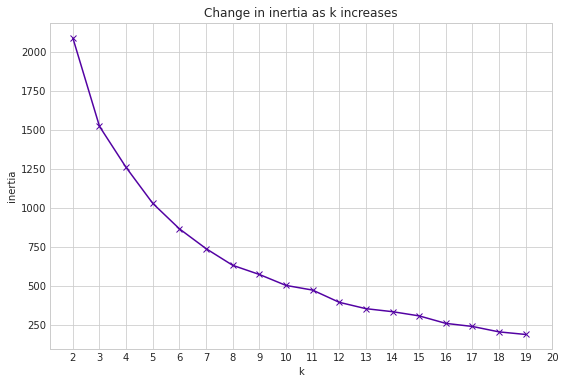

In [80]:
# lets plot inertia vs k
X = train[['age', 'worry_economy', 'happen_wealthgap']]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 21))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [81]:
# Fit K-Means (just on train, again!)
X = train[["age", "worry_economy", "happen_wealthgap"]]
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

train['cluster1'] = kmeans.predict(X)

In [82]:
test['cluster1'] = kmeans.predict(test.replace(replace_key)[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']])

validate['cluster1'] = kmeans.predict(validate.replace(replace_key)[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']])

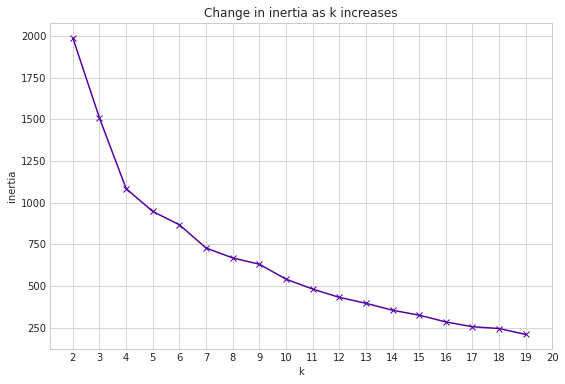

In [141]:
# lets plot inertia vs k
X = train[['age', 'job_benefits', 'job_security']]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 21))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [142]:
# Fit K-Means (just on train, again!)
X = train[['age', 'job_benefits', 'job_security']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train['cluster2'] = kmeans.predict(X)

In [143]:
test['cluster2'] = kmeans.predict(test.replace(replace_key)[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']])

validate['cluster2'] = kmeans.predict(validate.replace(replace_key)[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']])

# Region Clusters

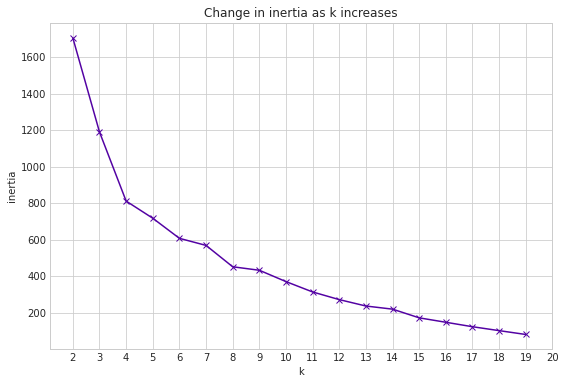

In [144]:
# lets plot inertia vs k
X = train[['census_region', 'legal_immigration_levels', 'ss_cut']]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 21))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [145]:
# Fit K-Means (just on train, again!)
X = train[['census_region', 'legal_immigration_levels', 'ss_cut']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train['cluster3'] = kmeans.predict(X)

In [146]:
test['cluster3'] = kmeans.predict(test.replace(replace_key)[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']])

validate['cluster3'] = kmeans.predict(validate.replace(replace_key)[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']])

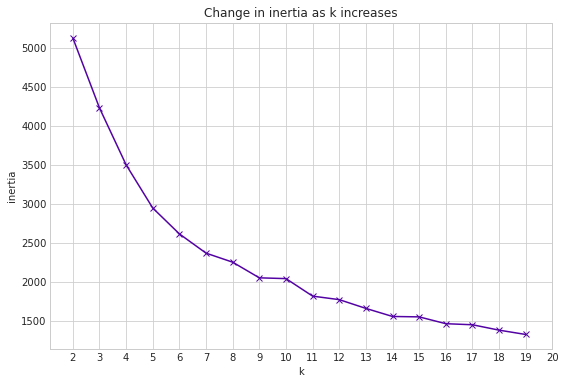

In [147]:
# lets plot inertia vs k
X = train[['census_region', 'religion', 'fut_abortion', 'pop_growth']]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 21))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [148]:
# Fit K-Means (just on train, again!)
X = train[['census_region', 'legal_immigration_levels', 'ss_cut']]
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

train['cluster4'] = kmeans.predict(X)

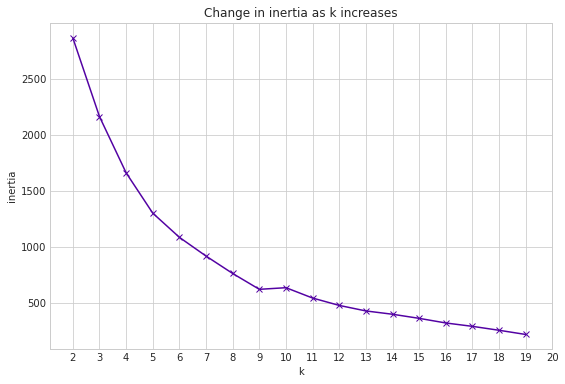

In [149]:
# lets plot inertia vs k
X = train[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 21))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [150]:
# Fit K-Means (just on train, again!)
X = train[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']]
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

train['cluster4'] = kmeans.predict(X)

In [151]:
test['cluster4'] = kmeans.predict(test.replace(replace_key)[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']])

validate['cluster4'] = kmeans.predict(validate.replace(replace_key)[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']])

# Education

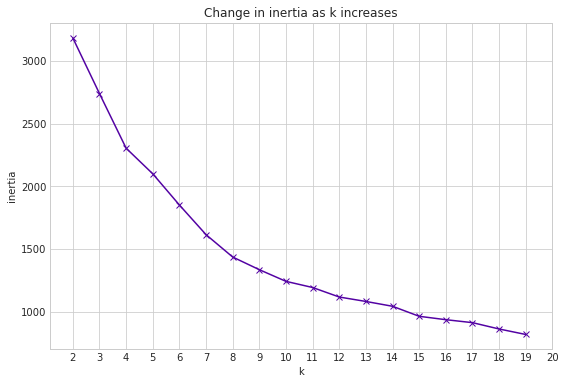

In [152]:
# lets plot inertia vs k
X = train[['highest_education_three_categories', 'worry_public_schools', 'college_uni', 'priority_education']]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 21))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [153]:
# Fit K-Means (just on train, again!)
X = train[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']]
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

train['cluster5'] = kmeans.predict(X)

In [154]:
kmeans.predict(X)

array([1, 3, 3, ..., 4, 8, 3], dtype=int32)

In [155]:
test['cluster5'] = kmeans.predict(test.replace(replace_key)[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']])

validate['cluster5'] = kmeans.predict(validate.replace(replace_key)[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']])

In [156]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

census_region  priority_undocumented_immigration  priority_more_immigration
0       2.450980                       3.000000e+00               3.379085e+00
1       0.732955                       8.323864e-01              -1.332268e-15
2       1.375000                       4.062500e+00               0.000000e+00
3       0.000000                       3.000000e+00               1.830508e+00
4       2.466102                      -8.881784e-16              -1.110223e-15
5       2.503106                       1.496894e+00              -4.440892e-16
6       2.494253                       3.000000e+00               1.821839e+00
7       0.716578                       3.000000e+00               3.331551e+00
8       1.000000                       3.000000e+00               1.750000e+00

In [157]:
train.groupby('cluster5')['census_region', 'priority_undocumented_immigration', 'priority_more_immigration'].mean()


census_region  priority_undocumented_immigration  \
cluster5                                                     
0              2.450980                           3.000000   
1              0.732955                           0.832386   
2              1.375000                           4.062500   
3              0.000000                           3.000000   
4              2.466102                           0.000000   
5              2.503106                           1.496894   
6              2.494253                           3.000000   
7              0.716578                           3.000000   
8              1.000000                           3.000000   

          priority_more_immigration  
cluster5                             
0                          3.379085  
1                          0.000000  
2                          0.000000  
3                          1.830508  
4                          0.000000  
5                          0.000000  
6                          1.821839  
7                          3.331551  
8                          1.750000

In [158]:
#Get dummy variables for Classification models
o = e.generate_and_return_obj(df)
o.X_train_dummies.head()

qkey    weight  device_type_Mobile phone  device_type_Tablet  \
1859  201801113305  3.057078                         1                   0   
96          191336  0.433484                         0                   0   
420         668019  2.413983                         0                   0   
1424  201801054651  0.362586                         1                   0   
114         200943  0.303046                         0                   0   

      language_Spanish  form_Form 2  \
1859                 0            0   
96                   0            1   
420                  0            1   
1424                 0            1   
114                  0            1   

      happen_general_The U.S. economy will be STRONGER  \
1859                                                 0   
96                                                   0   
420                                                  0   
1424                                                 0   
114                                                  0   

      happen_general_The U.S. economy will be WEAKER  \
1859                                               1   
96                                                 1   
420                                                1   
1424                                               1   
114                                                1   

      happen_health_Health care will be MORE affordable  \
1859                                                  1   
96                                                    0   
420                                                   0   
1424                                                  1   
114                                                   0   

      happen_health_Refused  ...  \
1859                      0  ...   
96                        1  ...   
420                       0  ...   
1424                      0  ...   
114                       0  ...   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
1859                                                  0                                                    
96                                                    1                                                    
420                                                   0                                                    
1424                                                  0                                                    
114                                                   0                                                    

      registered_to_vote_nan  political_views_Liberal  \
1859                       0                        0   
96                         0                        1   
420                        1                        1   
1424                       0                        1   
114                        0                        0   

      political_views_Moderate  political_views_Refused  \
1859                         0                        0   
96                           0                        0   
420                          0                        0   
1424                         0                        0   
114                          1                        0   

      political_views_Very conservative  political_views_Very liberal  \
1859                                  0                             0   
96                                    0                             0   
420                                   0                             0   
1424                                  0                             0   
114                                   0                             0   

      internet_access_Non Internet User  volunteer_Refused  volunteer_Yes  
1859                                  0                  0              1  
96                                    0                  0              0  
420                                   

Text(0.5, 1.0, 'Visualizing Cluster Centers')

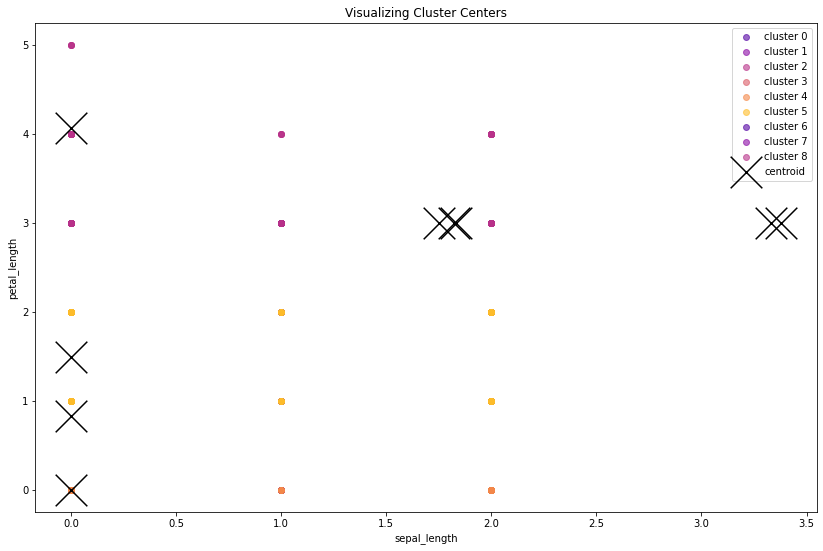

In [159]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster5'):
    plt.scatter(x=subset.happen_wealthgap, y=subset.priority_undocumented_immigration, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='priority_undocumented_immigration', x='priority_more_immigration', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

In [160]:
from sklearn.preprocessing import OneHotEncoder

In [161]:
enc = OneHotEncoder(handle_unknown='ignore')
X = train.drop(columns=['qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude'])
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [162]:
train.replace(revert_key)

qkey   device_type language    form              attitude  \
1859  201801113305  Mobile phone  English  Form 1   Somewhat optimistic   
96          191336       Desktop  English  Form 2  Somewhat pessimistic   
420         668019       Desktop  English  Form 2   Somewhat optimistic   
1424  201801054651  Mobile phone  English  Form 2   Somewhat optimistic   
114         200943       Desktop  English  Form 2  Somewhat pessimistic   
...            ...           ...      ...     ...                   ...   
678   201501605240        Tablet  English  Form 2  Somewhat pessimistic   
957   201701615366       Desktop  English  Form 1   Somewhat optimistic   
239         333639  Mobile phone  English  Form 1   Somewhat optimistic   
1795  201801105856  Mobile phone  English  Form 2   Somewhat optimistic   
1297  201801034069  Mobile phone  English  Form 2   Somewhat optimistic   

               avg_family                     happen_general  \
1859  Stay about the same    The U.S. economy will be WEAKER   
96              Get worse    The U.S. economy will be WEAKER   
420             Get worse    The U.S. economy will be WEAKER   
1424            Get worse    The U.S. economy will be WEAKER   
114   Stay about the same    The U.S. economy will be WEAKER   
...                   ...                                ...   
678   Stay about the same    The U.S. economy will be WEAKER   
957            Get better    The U.S. economy will be WEAKER   
239   Stay about the same    The U.S. economy will be WEAKER   
1795           Get better  The U.S. economy will be STRONGER   
1297           Get better  The U.S. economy will be STRONGER   

                            happen_health                    happen_race  \
1859  Health care will be MORE affordable    Race relations will IMPROVE   
96                                Refused                        Refused   
420   Health care will be LESS affordable  Race relations will GET WORSE   
1424  Health care will be MORE affordable  Race relations will GET WORSE   
114   Health care will be LESS affordable    Race relations will IMPROVE   
...                                   ...                            ...   
678   Health care will be MORE affordable    Race relations will IMPROVE   
957   Health care will be MORE affordable    Race relations will IMPROVE   
239   Health care will be LESS affordable  Race relations will GET WORSE   
1795  Health care will be LESS affordable                        Refused   
1297  Health care will be LESS affordable    Race relations will IMPROVE   

                                        happen_usa  ...    weight is_pes  \
1859  The U.S. will be LESS important in the world  ...  3.057078      0   
96    The U.S. will be LESS important in the world  ...  0.433484      1   
420   The U.S. will be LESS important in the world  ...  2.413983      0   
1424  The U.S. will be LESS important in the world  ...  0.362586      0   
114   The U.S. will be LESS important in the world  ...  0.303046      1   
...                                            ...  ...       ...    ...   
678   The U.S. will be LESS important in the world  ...  2.336849      1   
957   The U.S. will be MORE important in the world  ...  0.553714      0   
239   The U.S. will be MORE important in the world  ...  1.368277      0   
1795                                       Refused  ...  1.338218      0   
1297  The U.S. will be LESS important in the world  ...  1.850798      0   

     pes_val is_very_pes is_very_opt cluster1 cluster2 cluster3 cluster4  \
1859       1           0           0        3        1        3        2   
96         2           0           0        5        1        3        7   
420        1           0           0        2        2        3        7   
1424       1           0           0        2        0        0        0   
114        2           0           0        2        2        3        4   
...      ...         ...         ...      ...      ...      ..

In [163]:
dummy_df = pd.get_dummies(train.replace(revert_key).drop(columns=['qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude']), drop_first=True)

In [164]:
train

qkey  device_type  language  form  attitude  avg_family  \
1859  201801113305            0         0     0         0           2   
96          191336            1         0     1         1           0   
420         668019            1         0     1         0           0   
1424  201801054651            0         0     1         0           0   
114         200943            1         0     1         1           2   
...            ...          ...       ...   ...       ...         ...   
678   201501605240            2         0     1         1           2   
957   201701615366            1         0     0         0           1   
239         333639            0         0     0         0           2   
1795  201801105856            0         0     1         0           1   
1297  201801034069            0         0     1         0           1   

      happen_general  happen_health  happen_race  happen_usa  ...    weight  \
1859               1              0            0           1  ...  3.057078   
96                 1              2            2           1  ...  0.433484   
420                1              1            1           1  ...  2.413983   
1424               1              0            1           1  ...  0.362586   
114                1              1            0           1  ...  0.303046   
...              ...            ...          ...         ...  ...       ...   
678                1              0            0           1  ...  2.336849   
957                1              0            0           0  ...  0.553714   
239                1              1            1           0  ...  1.368277   
1795               0              1            2           2  ...  1.338218   
1297               0              1            0           1  ...  1.850798   

      is_pes  pes_val  is_very_pes  is_very_opt  cluster1  cluster2  cluster3  \
1859       0        1            0            0         3         1         3   
96         1        2            0            0         5         1         3   
420        0        1            0            0         2         2         3   
1424       0        1            0            0         2         0         0   
114        1        2            0            0         2         2         3   
...      ...      ...          ...          ...       ...       ...       ...   
678        1        2            0            0         0         2         3   
957        0        1            0            0         2         2         3   
239        0        1            0            0         2         0         0   
1795       0        1            0            0         2         0         3   
1297       0        1            0            0         1         3         3   

      cluster4  cluster5  
1859         2         1  
96           7         3  
420          7         3  
1424         0         6  
114          4         7  
...        ...       ...  
678          7         8  
957          2         1  
239          1         4  
1795         7         8  
1297         7         3  

[1408 rows x 133 columns]

In [165]:
# Create a dataframe to store and compare our models' performances
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [166]:
import model as m

In [167]:
# Thise function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
tree_list, tree_model_name_list = m.decision_tree_models(10)

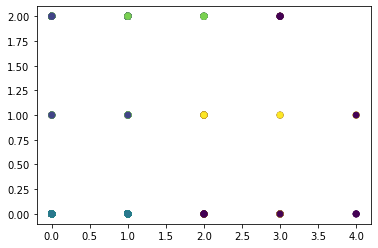

In [168]:
plt.scatter(train.worry_economy, train.happen_wealthgap, c = train.cluster1)

In [169]:
X_train = train.astype({'cluster1': 'category', 'cluster2': 'category', 'cluster3': 'category', 'cluster4': 'category', 'cluster5': 'category'})

In [170]:
test

qkey   device_type language    form              attitude  \
790   201501684222        Tablet  English  Form 2   Somewhat optimistic   
1117  201801006202  Mobile phone  English  Form 2  Somewhat pessimistic   
1985  201801127577  Mobile phone  English  Form 1   Somewhat optimistic   
917   201701267020        Tablet  English  Form 1      Very pessimistic   
668   201501602753       Desktop  English  Form 2      Very pessimistic   
...            ...           ...      ...     ...                   ...   
352         640394        Tablet  English  Form 2       Very optimistic   
507         706103       Desktop  English  Form 2  Somewhat pessimistic   
1625  201801080561       Desktop  English  Form 2   Somewhat optimistic   
246         339984       Desktop  English  Form 1   Somewhat optimistic   
1790  201801104363  Mobile phone  English  Form 2   Somewhat optimistic   

               avg_family                     happen_general  \
790            Get better  The U.S. economy will be STRONGER   
1117            Get worse  The U.S. economy will be STRONGER   
1985  Stay about the same  The U.S. economy will be STRONGER   
917             Get worse                            Refused   
668             Get worse    The U.S. economy will be WEAKER   
...                   ...                                ...   
352            Get better  The U.S. economy will be STRONGER   
507             Get worse    The U.S. economy will be WEAKER   
1625           Get better  The U.S. economy will be STRONGER   
246   Stay about the same    The U.S. economy will be WEAKER   
1790            Get worse                            Refused   

                            happen_health                    happen_race  \
790   Health care will be MORE affordable    Race relations will IMPROVE   
1117  Health care will be LESS affordable  Race relations will GET WORSE   
1985  Health care will be MORE affordable    Race relations will IMPROVE   
917                               Refused  Race relations will GET WORSE   
668   Health care will be LESS affordable                        Refused   
...                                   ...                            ...   
352   Health care will be MORE affordable    Race relations will IMPROVE   
507   Health care will be MORE affordable    Race relations will IMPROVE   
1625  Health care will be MORE affordable    Race relations will IMPROVE   
246   Health care will be MORE affordable    Race relations will IMPROVE   
1790  Health care will be LESS affordable  Race relations will GET WORSE   

                                        happen_usa  ...    weight is_pes  \
790   The U.S. will be MORE important in the world  ...  2.445902      0   
1117  The U.S. will be MORE important in the world  ...  0.349157      1   
1985  The U.S. will be MORE important in the world  ...  0.414757      0   
917   The U.S. will be LESS important in the world  ...  1.089272      1   
668   The U.S. will be LESS important in the world  ...  0.545932      1   
...                                            ...  ...       ...    ...   
352   The U.S. will be LESS important in the world  ...  0.236365      0   
507   The U.S. will be LESS important in the world  ...  1.509286      1   
1625  The U.S. will be MORE important in the world  ...  1.648605      0   
246   The U.S. will be LESS important in the world  ...  1.717537      0   
1790                                       Refused  ...  0.558447      0   

     pes_val is_very_pes is_very_opt cluster1 cluster2 cluster3 cluster4  \
790        1           0           0        4        0        1        4   
1117       2           0           0        1        3        2        5   
1985       1           0           0        3        1        0        1   
917        3           1           0        2        2        3        8   
668        3           1           0        5        3        2        0   
...      ...         ...         ...      ...      ...      ..

In [171]:
X_validate = validate.astype({'cluster1': 'category', 'cluster2': 'category', 'cluster3': 'category', 'cluster4': 'category', 'cluster5': 'category'}).drop(columns=['qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude'])
X_test = test.astype({'cluster1': 'category', 'cluster2': 'category', 'cluster3': 'category', 'cluster4': 'category', 'cluster5': 'category'}).drop(columns=['qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude'])

In [172]:
X_train_dummies = pd.get_dummies(X_train.replace(revert_key).drop(columns=['qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude']), drop_first=True)

In [173]:
y_train = train.is_pes
y_validate = validate.is_pes

In [174]:
X_val_dummies

device_type_Mobile phone  device_type_Tablet  language_Spanish  \
294                          0                   0                 0   
1907                         0                   1                 0   
1699                         0                   1                 0   
2002                         0                   0                 0   
406                          1                   0                 0   
...                        ...                 ...               ...   
2454                         0                   0                 0   
603                          0                   0                 0   
361                          1                   0                 0   
751                          1                   0                 0   
2152                         0                   0                 0   

      form_Form 2  avg_family_Get worse  avg_family_Refused  \
294             0                     0                   0   
1907            1                     1                   0   
1699            1                     0                   0   
2002            1                     0                   0   
406             0                     1                   0   
...           ...                   ...                 ...   
2454            1                     1                   0   
603             0                     1                   0   
361             1                     1                   0   
751             0                     0                   0   
2152            1                     1                   0   

      avg_family_Stay about the same  \
294                                0   
1907                               0   
1699                               1   
2002                               0   
406                                0   
...                              ...   
2454                               0   
603                                0   
361                                0   
751                                1   
2152                               0   

      happen_general_The U.S. economy will be STRONGER  \
294                                                  1   
1907                                                 0   
1699                                                 0   
2002                                                 0   
406                                                  0   
...                                                ...   
2454                                                 0   
603                                                  0   
361                                                  0   
751                                                  1   
2152                                                 0   

      happen_general_The U.S. economy will be WEAKER  \
294                                                0   
1907                                               1   
1699                                               0   
2002                                               0   
406                                                1   
...                                              ...   
2454                                               1   
603                                                1   
361                                                1   
751                                                0   
2152                                               1   

      happen_health_Health care will be MORE affordable  ...  cluster4_7  \
294                                                   1  ...           1   
1907                                                  0  ...           0   
1699                                                  1  ...           0   
2002                                                  0  ...           0   
406                                                   0  ...           0   
...                                                 ...  ...         ...   
2

In [175]:
X_test_dummies

device_type_Mobile phone  device_type_Tablet  language_Spanish  \
790                          0                   1                 0   
1117                         1                   0                 0   
1985                         1                   0                 0   
917                          0                   1                 0   
668                          0                   0                 0   
...                        ...                 ...               ...   
352                          0                   1                 0   
507                          0                   0                 0   
1625                         0                   0                 0   
246                          0                   0                 0   
1790                         1                   0                 0   

      form_Form 2  avg_family_Get worse  avg_family_Refused  \
790             1                     0                   0   
1117            1                     1                   0   
1985            0                     0                   0   
917             0                     1                   0   
668             1                     1                   0   
...           ...                   ...                 ...   
352             1                     0                   0   
507             1                     1                   0   
1625            1                     0                   0   
246             0                     0                   0   
1790            1                     1                   0   

      avg_family_Stay about the same  \
790                                0   
1117                               0   
1985                               1   
917                                0   
668                                0   
...                              ...   
352                                0   
507                                0   
1625                               0   
246                                1   
1790                               0   

      happen_general_The U.S. economy will be STRONGER  \
790                                                  1   
1117                                                 1   
1985                                                 1   
917                                                  0   
668                                                  0   
...                                                ...   
352                                                  1   
507                                                  0   
1625                                                 1   
246                                                  0   
1790                                                 0   

      happen_general_The U.S. economy will be WEAKER  \
790                                                0   
1117                                               0   
1985                                               0   
917                                                0   
668                                                1   
...                                              ...   
352                                                0   
507                                                1   
1625                                               0   
246                                                1   
1790                                               0   

      happen_health_Health care will be MORE affordable  ...  cluster4_7  \
790                                                   1  ...           0   
1117                                                  0  ...           0   
1985                                                  1  ...           0   
917                                                   0  ...           1   
668                                                   0  ...           0   
...                                                 ...  ...         ...   
3

In [177]:
X_val_dummies = pd.get_dummies(X_validate, drop_first=True)
X_test_dummies = pd.get_dummies(test, drop_first=True)

In [178]:
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [179]:
test

qkey   device_type language    form              attitude  \
790   201501684222        Tablet  English  Form 2   Somewhat optimistic   
1117  201801006202  Mobile phone  English  Form 2  Somewhat pessimistic   
1985  201801127577  Mobile phone  English  Form 1   Somewhat optimistic   
917   201701267020        Tablet  English  Form 1      Very pessimistic   
668   201501602753       Desktop  English  Form 2      Very pessimistic   
...            ...           ...      ...     ...                   ...   
352         640394        Tablet  English  Form 2       Very optimistic   
507         706103       Desktop  English  Form 2  Somewhat pessimistic   
1625  201801080561       Desktop  English  Form 2   Somewhat optimistic   
246         339984       Desktop  English  Form 1   Somewhat optimistic   
1790  201801104363  Mobile phone  English  Form 2   Somewhat optimistic   

               avg_family                     happen_general  \
790            Get better  The U.S. economy will be STRONGER   
1117            Get worse  The U.S. economy will be STRONGER   
1985  Stay about the same  The U.S. economy will be STRONGER   
917             Get worse                            Refused   
668             Get worse    The U.S. economy will be WEAKER   
...                   ...                                ...   
352            Get better  The U.S. economy will be STRONGER   
507             Get worse    The U.S. economy will be WEAKER   
1625           Get better  The U.S. economy will be STRONGER   
246   Stay about the same    The U.S. economy will be WEAKER   
1790            Get worse                            Refused   

                            happen_health                    happen_race  \
790   Health care will be MORE affordable    Race relations will IMPROVE   
1117  Health care will be LESS affordable  Race relations will GET WORSE   
1985  Health care will be MORE affordable    Race relations will IMPROVE   
917                               Refused  Race relations will GET WORSE   
668   Health care will be LESS affordable                        Refused   
...                                   ...                            ...   
352   Health care will be MORE affordable    Race relations will IMPROVE   
507   Health care will be MORE affordable    Race relations will IMPROVE   
1625  Health care will be MORE affordable    Race relations will IMPROVE   
246   Health care will be MORE affordable    Race relations will IMPROVE   
1790  Health care will be LESS affordable  Race relations will GET WORSE   

                                        happen_usa  ...    weight is_pes  \
790   The U.S. will be MORE important in the world  ...  2.445902      0   
1117  The U.S. will be MORE important in the world  ...  0.349157      1   
1985  The U.S. will be MORE important in the world  ...  0.414757      0   
917   The U.S. will be LESS important in the world  ...  1.089272      1   
668   The U.S. will be LESS important in the world  ...  0.545932      1   
...                                            ...  ...       ...    ...   
352   The U.S. will be LESS important in the world  ...  0.236365      0   
507   The U.S. will be LESS important in the world  ...  1.509286      1   
1625  The U.S. will be MORE important in the world  ...  1.648605      0   
246   The U.S. will be LESS important in the world  ...  1.717537      0   
1790                                       Refused  ...  0.558447      0   

     pes_val is_very_pes is_very_opt cluster1 cluster2 cluster3 cluster4  \
790        1           0           0        4        0        1        4   
1117       2           0           0        1        3        2        5   
1985       1           0           0        3        1        0        1   
917        3           1           0        2        2        3        8   
668        3           1           0        5        3        2        0   
...      ...         ...         ...      ...      ...      ..

In [180]:
validate

qkey   device_type language    form              attitude  \
294         612280       Desktop  English  Form 1       Very optimistic   
1907  201801119088        Tablet  English  Form 2      Very pessimistic   
1699  201801090924        Tablet  English  Form 2      Very pessimistic   
2002  201801129100       Desktop  English  Form 2   Somewhat optimistic   
406         665493  Mobile phone  English  Form 1  Somewhat pessimistic   
...            ...           ...      ...     ...                   ...   
2454  201801181642       Desktop  English  Form 2      Very pessimistic   
603   201501191014       Desktop  English  Form 1      Very pessimistic   
361         646079  Mobile phone  English  Form 2      Very pessimistic   
751   201501653793  Mobile phone  English  Form 1  Somewhat pessimistic   
2152  201801143961       Desktop  English  Form 2  Somewhat pessimistic   

               avg_family                     happen_general  \
294            Get better  The U.S. economy will be STRONGER   
1907            Get worse    The U.S. economy will be WEAKER   
1699  Stay about the same                            Refused   
2002           Get better                            Refused   
406             Get worse    The U.S. economy will be WEAKER   
...                   ...                                ...   
2454            Get worse    The U.S. economy will be WEAKER   
603             Get worse    The U.S. economy will be WEAKER   
361             Get worse    The U.S. economy will be WEAKER   
751   Stay about the same  The U.S. economy will be STRONGER   
2152            Get worse    The U.S. economy will be WEAKER   

                            happen_health                    happen_race  \
294   Health care will be MORE affordable  Race relations will GET WORSE   
1907  Health care will be LESS affordable  Race relations will GET WORSE   
1699  Health care will be MORE affordable    Race relations will IMPROVE   
2002                              Refused                        Refused   
406   Health care will be LESS affordable  Race relations will GET WORSE   
...                                   ...                            ...   
2454  Health care will be LESS affordable  Race relations will GET WORSE   
603   Health care will be LESS affordable  Race relations will GET WORSE   
361   Health care will be LESS affordable    Race relations will IMPROVE   
751   Health care will be MORE affordable    Race relations will IMPROVE   
2152  Health care will be MORE affordable    Race relations will IMPROVE   

                                        happen_usa  ...    weight is_pes  \
294   The U.S. will be MORE important in the world  ...  0.594635      0   
1907  The U.S. will be MORE important in the world  ...  1.389516      1   
1699  The U.S. will be LESS important in the world  ...  0.287261      1   
2002  The U.S. will be MORE important in the world  ...  1.167538      0   
406   The U.S. will be LESS important in the world  ...  0.380811      1   
...                                            ...  ...       ...    ...   
2454  The U.S. will be LESS important in the world  ...  1.246091      1   
603   The U.S. will be LESS important in the world  ...  0.769062      1   
361   The U.S. will be LESS important in the world  ...  1.344620      1   
751   The U.S. will be MORE important in the world  ...  0.752621      1   
2152  The U.S. will be LESS important in the world  ...  1.449815      1   

     pes_val is_very_pes is_very_opt cluster1 cluster2 cluster3 cluster4  \
294        0           0           1        2        2        3        8   
1907       3           1           0        0        0        1        7   
1699       3           1           0        0        0        1        7   
2002       1           0           0        5        3        2        0   
406        2           0           0        2        2        1        2   
...      ...         ...         ...      ...      ...      ..

In [186]:
X_test_dummies

qkey    weight  is_pes  pes_val  is_very_pes  is_very_opt  \
790   201501684222  2.445902       0        1            0            0   
1117  201801006202  0.349157       1        2            0            0   
1985  201801127577  0.414757       0        1            0            0   
917   201701267020  1.089272       1        3            1            0   
668   201501602753  0.545932       1        3            1            0   
...            ...       ...     ...      ...          ...          ...   
352         640394  0.236365       0        0            0            1   
507         706103  1.509286       1        2            0            0   
1625  201801080561  1.648605       0        1            0            0   
246         339984  1.717537       0        1            0            0   
1790  201801104363  0.558447       0        1            0            0   

      cluster1  cluster2  cluster3  cluster4  ...  \
790          4         0         1         4  ...   
1117         1         3         2         5  ...   
1985         3         1         0         1  ...   
917          2         2         3         8  ...   
668          5         3         2         0  ...   
...        ...       ...       ...       ...  ...   
352          1         3         2         5  ...   
507          4         0         1         4  ...   
1625         4         0         1         4  ...   
246          5         3         2         6  ...   
1790         0         0         1         7  ...   

      registered_to_vote_You are NOT registered to vote at your current address  \
790                                                   0                           
1117                                                  0                           
1985                                                  0                           
917                                                   0                           
668                                                   0                           
...                                                 ...                           
352                                                   1                           
507                                                   0                           
1625                                                  0                           
246                                                   0                           
1790                                                  0                           

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
790                                                   0                                                    
1117                                                  1                                                    
1985                                                  0                                                    
917                                                   0                                                    
668                                                   0                                                    
...                                                 ...                                                    
352                                                   0                                                    
507                                                   0                                                    
1625                                                  0                                                    
246                                                   0                                                    
1790                                                  1                                                    

      registered_to_vote_nan  political_views_Liberal  \
790                        0                        1   
1117                       0                        0   
1985       

In [ ]:
train.columns

In [ ]:
def create_cluster(df, X, k, cluster_name):
    ''' Takes in df, X (dataframe with variables you want to cluster on), k number of clusters,
    and the name you want to name the column (enter column as string)
    It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    the scaler and kmeans object and unscaled centroids as a dataframe
    note: train_scaled enter the scaled train dataframe
    for X enter the dataframe of the two features for your cluster
    for k enter number of features
    for cluster_name enter name of the cluster column name you want as a string
    '''
    # Fit K-Means (just on train, again!)
    X = train[['census_region', 'priority_undocumented_immigration', 'priority_more_immigration']]

    train['cluster4'] = kmeans.predict(X)
    
    
    kmeans = KMeans(n_clusters = k, random_state = 123)
    kmeans.fit(X)
    kmeans.predict(X)
    df[cluster_name] = kmeans.predict(X)
    # train_scaled[cluster_name] = 'cluster_' + train_scaled[cluster_name].astype(str)
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    return train, X, scaler, kmeans, centroids

In [ ]:
X_train_dummies

In [ ]:
X_val_dummies

In [ ]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(X_train_dummies, y_train, X_val_dummies, y_validate, model, name, score_df)

In [ ]:
X_train_dummies

In [133]:
for col in X_train_dummies.columns:
    if col not in X_val_dummies.columns:
        print(col)

worry_morals_Refused
priority_healthcare_Refused
priority_undocumented_immigration_Refused
priority_more_immigration_Refused
priority_climate_Refused
harass_sexual_personal_exp_Refused
age_DK/REF
sex_Refused
highest_education_three_categories_Don't know/Refused
highest_education_six_categories_Don't know/Refused
birthplace_Other U.S. territory


In [ ]:
X_test_dummies

fig, axes = plt.subplots(nrows=3, ncols=2, sharey=False, sharex=False,  figsize=(20,20))

# Set suptitle
#fig.suptitle(f'Univariate')
#plt.xticks(rotation=45)

# First plot and its title
sns.countplot(data=train.replace(revert_key), x='attitude', ax=axes[0,0]).set_title('Overall Attitude', fontsize=20)
axes[0,0].tick_params(labelrotation=60)
axes[0,0].set(xlabel=None)

# Second plot and its title
sns.countplot(data=train.replace(revert_key), x='age', ax=axes[0,1]).set_title('Age Groups', fontsize=20)
axes[0,1].tick_params(labelrotation=60)
axes[0,1].set(xlabel=None)

# Third plot and its title
sns.countplot(data=train.replace(revert_key), x='sex', ax=axes[1,0]).set_title('Sex', fontsize=20)
axes[1,0].tick_params(labelrotation=60)
axes[1,0].set(xlabel=None)

# Fourth plot and its title
sns.countplot(data=train.replace(revert_key), x='family_income_nine_categories', ax=axes[1,1]).set_title('Income Level', fontsize=20)
axes[1,1].tick_params(labelrotation=60)
axes[1,1].set(xlabel=None)

# Fifth plot and its title
sns.countplot(data=train.replace(revert_key), x='highest_education_six_categories', ax=axes[2,0]).set_title('Education Level', fontsize=20)
axes[2,0].tick_params(labelrotation=60)
axes[2,0].set(xlabel=None)

# Sixth plot and its title
sns.countplot(data=train.replace(revert_key), x='political_party_identity', ax=axes[2,1]).set_title('Political Affiliation', fontsize=20)
axes[2,1].tick_params(labelrotation=60)
axes[2,1].set(xlabel=None)

plt.rcParams.update({'font.size': 10})
plt.tight_layout(pad=3)
plt.show()
plt.savefig('images/_univariate_exploration.png')

# Feature Importance
## Older

In [196]:
train = train.replace(revert_key)
#validate = validate.replace(replace_key)
#test = test.replace(replace_key)

In [336]:
older_df = train[(train.age=='65+') | (train.age=='50-64')]
younger_df =  train[(train.age == '18-29') | (train.age=='30-49')]

In [337]:
older = e.generate_and_return_obj(older_df)
older.X_train_dummies.head()

device_type_Mobile phone  device_type_Tablet  language_Spanish  \
641                          0                   0                 0   
792                          0                   1                 0   
2380                         0                   0                 0   
914                          0                   1                 0   
1460                         0                   0                 0   

      form_Form 2  happen_general_The U.S. economy will be STRONGER  \
641             0                                                 1   
792             0                                                 1   
2380            1                                                 0   
914             0                                                 1   
1460            1                                                 1   

      happen_general_The U.S. economy will be WEAKER  \
641                                                0   
792                                                0   
2380                                               1   
914                                                0   
1460                                               0   

      happen_health_Health care will be MORE affordable  \
641                                                   1   
792                                                   1   
2380                                                  0   
914                                                   0   
1460                                                  1   

      happen_health_Refused  happen_race_Race relations will IMPROVE  \
641                       0                                        1   
792                       0                                        1   
2380                      0                                        0   
914                       0                                        1   
1460                      0                                        1   

      happen_race_Refused  ...  \
641                     0  ...   
792                     0  ...   
2380                    0  ...   
914                     0  ...   
1460                    0  ...   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
641                                                   0                                                    
792                                                   0                                                    
2380                                                  0                                                    
914                                                   0                                                    
1460                                                  0                                                    

      registered_to_vote_nan  political_views_Liberal  \
641                        0                        1   
792                        0                        0   
2380                       0                        0   
914                        0                        0   
1460                       0                        0   

      political_views_Moderate  political_views_Refused  \
641                          0                        0   
792                          1                        0   
2380                         1                        0   
914                          0                        0   
1460                         1                        0   

      political_views_Very conservative  political_views_Very liberal  \
641                                   0                             0   
792                                   0                             0   
2380                                  0                             0   
914                                   0                             0   
1460                                  0                             0   

      internet_access_Non Inte

In [338]:
print(f'Baseline Accuracy: {round((1.00 - older.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 53.55%


In [339]:
# Create a dataframe to store and compare our models' performances
score_df_older = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_older

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [340]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_older = m.test_a_model(older.X_train_dummies, older.y_train_dummies, older.X_validate_dummies, older.y_validate_dummies, model, name, score_df_older)

In [341]:
score_df_older.sort_values(by = 'validate_score', ascending = False).head(10)

model_name  train_score  \
26  including_all_features_random_forest_min_sampl...     0.913706   
17  including_all_features_random_forest_min_sampl...     0.939086   
16  including_all_features_random_forest_min_sampl...     0.918782   
56  including_all_features_random_forest_min_sampl...     0.817259   
39  including_all_features_random_forest_min_sampl...     0.824873   
33  including_all_features_random_forest_min_sampl...     0.885787   
13  including_all_features_random_forest_min_sampl...     0.875635   
29  including_all_features_random_forest_min_sampl...     0.819797   
32  including_all_features_random_forest_min_sampl...     0.857868   
24  including_all_features_random_forest_min_sampl...     0.895939   

    validate_score  
26        0.782353  
17        0.776471  
16        0.776471  
56        0.776471  
39        0.770588  
33        0.770588  
13        0.770588  
29        0.770588  
32        0.770588  
24        0.770588

In [342]:
from sklearn.ensemble import RandomForestClassifier


In [343]:
#Make model
rf_depth_0_leaf_9 = RandomForestClassifier(min_samples_leaf=9, max_depth=None)
#Fit Model
rf_depth_0_leaf_9.fit(older.X_train_dummies, older.y_train_dummies)

#Create data frame of feature importances, using our selected model
feature_importances_older = pd.DataFrame(rf_depth_0_leaf_9.feature_importances_, index = older.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_older = feature_importances_older.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_older.columns.names = ['category']

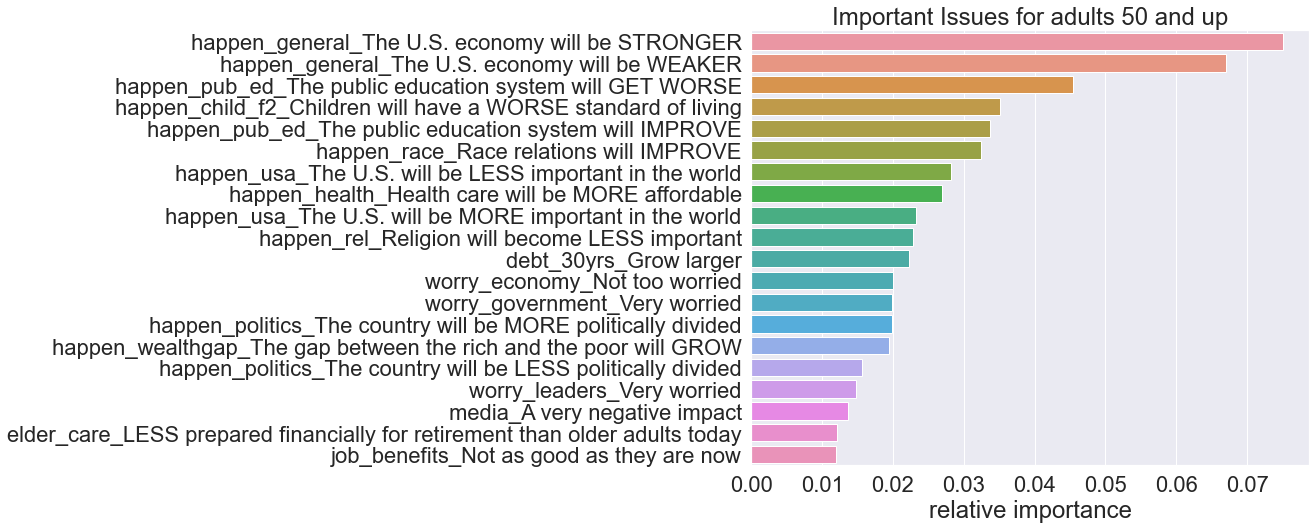

In [344]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_older = sns.barplot(x=feature_importances_older['relative importance'][0:20], y=feature_importances_older.index[0:20]).set(title="Important Issues for adults 50 and up")

## Younger

In [345]:
younger = e.generate_and_return_obj(younger_df)
younger.X_train_dummies.head()

device_type_Mobile phone  device_type_Tablet  language_Spanish  \
836                          0                   0                 0   
372                          1                   0                 0   
1974                         1                   0                 0   
975                          1                   0                 1   
1057                         1                   0                 0   

      form_Form 2  happen_general_The U.S. economy will be STRONGER  \
836             0                                                 0   
372             0                                                 1   
1974            0                                                 0   
975             0                                                 1   
1057            1                                                 0   

      happen_general_The U.S. economy will be WEAKER  \
836                                                1   
372                                                0   
1974                                               1   
975                                                0   
1057                                               1   

      happen_health_Health care will be MORE affordable  \
836                                                   1   
372                                                   1   
1974                                                  0   
975                                                   1   
1057                                                  0   

      happen_health_Refused  happen_race_Race relations will IMPROVE  \
836                       0                                        0   
372                       0                                        1   
1974                      1                                        0   
975                       0                                        1   
1057                      0                                        0   

      happen_race_Refused  ...  \
836                     0  ...   
372                     0  ...   
1974                    1  ...   
975                     0  ...   
1057                    0  ...   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
836                                                   0                                                    
372                                                   0                                                    
1974                                                  0                                                    
975                                                   0                                                    
1057                                                  1                                                    

      registered_to_vote_nan  political_views_Liberal  \
836                        0                        0   
372                        0                        0   
1974                       0                        0   
975                        1                        0   
1057                       0                        0   

      political_views_Moderate  political_views_Refused  \
836                          0                        0   
372                          1                        0   
1974                         1                        0   
975                          0                        0   
1057                         1                        0   

      political_views_Very conservative  political_views_Very liberal  \
836                                   0                             1   
372                                   0                             0   
1974                                  0                             0   
975                                   0                             1   
1057                                  0                             0   

      internet_access_Non Inte

In [346]:
print(f'Baseline Accuracy: {round((1.00 - younger.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 58.06%


In [347]:
# Create a dataframe to store and compare our models' performances
score_df_younger = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_younger

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [348]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_younger = m.test_a_model(younger.X_train_dummies, younger.y_train_dummies, younger.X_validate_dummies, younger.y_validate_dummies, model, name, score_df_younger)

In [349]:
score_df_younger.sort_values(by = 'validate_score', ascending = False).head(10)

model_name  train_score  \
34  including_all_features_random_forest_min_sampl...     0.900256   
15  including_all_features_random_forest_min_sampl...     0.936061   
30  including_all_features_random_forest_min_sampl...     0.828645   
62  including_all_features_random_forest_min_sampl...     0.843990   
7   including_all_features_random_forest_min_sampl...     0.953964   
57  including_all_features_random_forest_min_sampl...     0.828645   
24  including_all_features_random_forest_min_sampl...     0.895141   
22  including_all_features_random_forest_min_sampl...     0.861893   
51  including_all_features_random_forest_min_sampl...     0.856777   
42  including_all_features_random_forest_min_sampl...     0.874680   

    validate_score  
34        0.803571  
15        0.791667  
30        0.785714  
62        0.779762  
7         0.779762  
57        0.773810  
24        0.773810  
22        0.773810  
51        0.773810  
42        0.773810

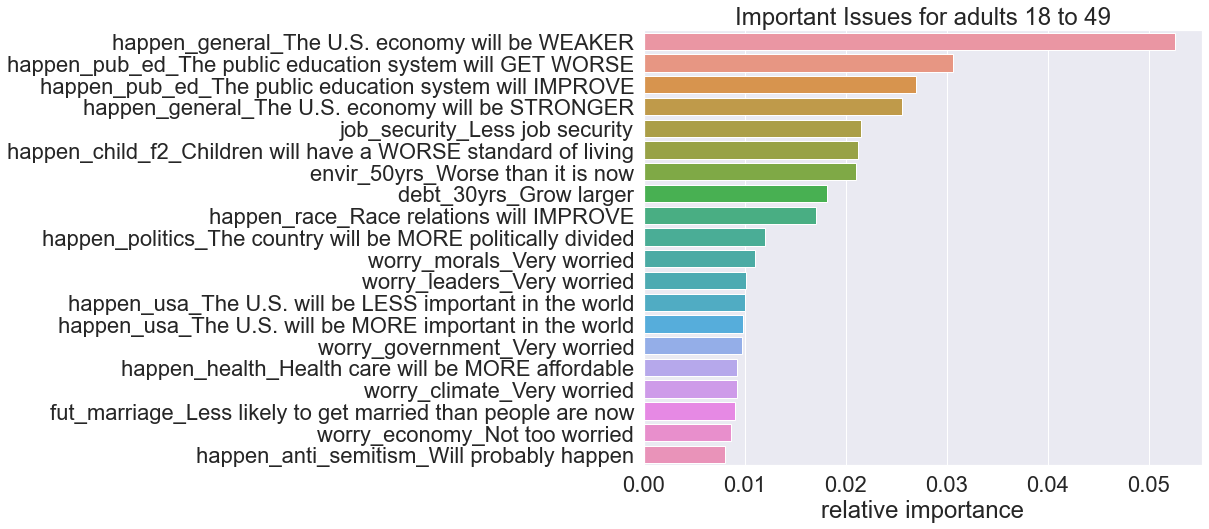

In [350]:
#Make model
rf_depth_8_leaf_3 = RandomForestClassifier(min_samples_leaf=3, max_depth=8)
#Fit Model
rf_depth_8_leaf_3.fit(younger.X_train_dummies, younger.y_train_dummies)

#Create data frame of feature importances, using our selected model
feature_importances_younger = pd.DataFrame(rf_depth_8_leaf_3.feature_importances_, index = younger.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_younger = feature_importances_younger.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_younger.columns.names = ['category']

#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_younger = sns.barplot(x=feature_importances_younger['relative importance'][0:20], y=feature_importances_younger.index[0:20]).set(title="Important Issues for adults 18 to 49")

In [303]:
train = train.drop(columns=['qkey', 'weight', 'pes_val', 'is_very_pes', 'is_very_opt', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5'])

In [304]:
train.census_region.value_counts()

South        556
Midwest      326
West         305
Northeast    221
Name: census_region, dtype: int64

In [305]:
s_df = train[train.census_region=='South']
mw =  train[train.census_region =='Midwest']
w_df = train[train.census_region=='West']
ne =  train[train.census_region =='Northeast']

## South

In [306]:
south = e.generate_and_return_obj(s_df)
south.X_train_dummies.head()

device_type_Mobile phone  device_type_Tablet  language_Spanish  \
300                          1                   0                 0   
2270                         1                   0                 0   
1362                         1                   0                 0   
1755                         0                   0                 0   
1839                         0                   0                 0   

      form_Form 2  happen_general_The U.S. economy will be STRONGER  \
300             1                                                 0   
2270            0                                                 0   
1362            0                                                 0   
1755            0                                                 0   
1839            1                                                 0   

      happen_general_The U.S. economy will be WEAKER  \
300                                                1   
2270                                               1   
1362                                               0   
1755                                               1   
1839                                               0   

      happen_health_Health care will be MORE affordable  \
300                                                   1   
2270                                                  0   
1362                                                  0   
1755                                                  0   
1839                                                  0   

      happen_health_Refused  happen_race_Race relations will IMPROVE  \
300                       0                                        0   
2270                      0                                        0   
1362                      0                                        0   
1755                      0                                        1   
1839                      0                                        0   

      happen_race_Refused  ...  \
300                     0  ...   
2270                    0  ...   
1362                    1  ...   
1755                    0  ...   
1839                    0  ...   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
300                                                   0                                                    
2270                                                  0                                                    
1362                                                  0                                                    
1755                                                  1                                                    
1839                                                  0                                                    

      registered_to_vote_nan  political_views_Liberal  \
300                        0                        0   
2270                       0                        1   
1362                       0                        0   
1755                       0                        0   
1839                       0                        0   

      political_views_Moderate  political_views_Refused  \
300                          1                        0   
2270                         0                        0   
1362                         0                        0   
1755                         0                        0   
1839                         1                        0   

      political_views_Very conservative  political_views_Very liberal  \
300                                   0                             0   
2270                                  0                             0   
1362                                  1                             0   
1755                                  1                             0   
1839                                  0                             0   

      internet_access_Non Inte

In [307]:
print(f'Baseline Accuracy: {round((1.00 - south.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 59.68%


In [308]:
# Create a dataframe to store and compare our models' performances
score_df_south = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_south

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [309]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_south = m.test_a_model(south.X_train_dummies, south.y_train_dummies, south.X_validate_dummies, south.y_validate_dummies, model, name, score_df_south)

In [335]:
score_df_south.sort_values(by = 'validate_score', ascending = False).head(10)

model_name  train_score  \
61  including_all_features_random_forest_min_sampl...     0.854839   
26  including_all_features_random_forest_min_sampl...     0.945161   
5   including_all_features_random_forest_min_sampl...     0.958065   
60  including_all_features_random_forest_min_sampl...     0.890323   
51  including_all_features_random_forest_min_sampl...     0.858065   
42  including_all_features_random_forest_min_sampl...     0.890323   
3   including_all_features_random_forest_min_sampl...     0.861290   
23  including_all_features_random_forest_min_sampl...     0.896774   
56  including_all_features_random_forest_min_sampl...     0.812903   
13  including_all_features_random_forest_min_sampl...     0.883871   

    validate_score  
61        0.776119  
26        0.776119  
5         0.768657  
60        0.768657  
51        0.768657  
42        0.761194  
3         0.761194  
23        0.761194  
56        0.761194  
13        0.761194

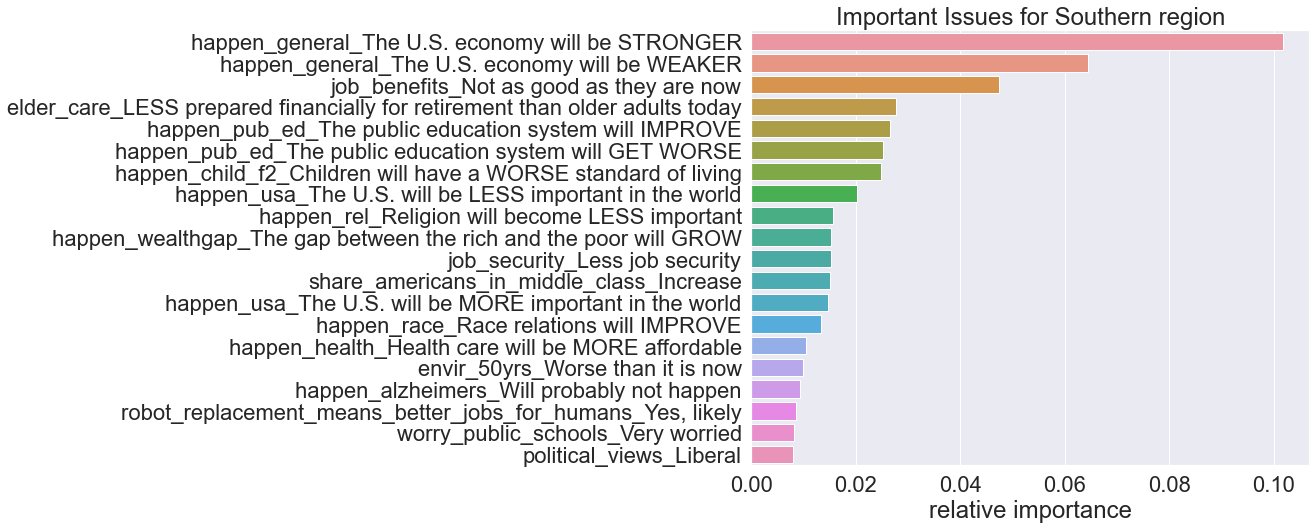

In [311]:
#Make model
rf_depth_5_leaf_5 = RandomForestClassifier(min_samples_leaf=5, max_depth=5)
#Fit Model
rf_depth_5_leaf_5.fit(south.X_train_dummies, south.y_train_dummies)

#Create data frame of feature importances, using our selected model
feature_importances_south = pd.DataFrame(rf_depth_5_leaf_5.feature_importances_, index = south.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_south = feature_importances_south.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_south.columns.names = ['category']

#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_south = sns.barplot(x=feature_importances_south['relative importance'][0:20], y=feature_importances_south.index[0:20]).set(title="Important Issues for Southern region")

### Midwest

In [312]:
midwest = e.generate_and_return_obj(mw)
midwest.X_train_dummies.head()

device_type_Mobile phone  device_type_Tablet  language_Spanish  \
2021                         1                   0                 0   
1968                         1                   0                 0   
416                          1                   0                 0   
1310                         1                   0                 0   
446                          0                   1                 0   

      form_Form 2  happen_general_The U.S. economy will be STRONGER  \
2021            0                                                 0   
1968            1                                                 0   
416             0                                                 1   
1310            0                                                 0   
446             1                                                 0   

      happen_general_The U.S. economy will be WEAKER  \
2021                                               0   
1968                                               1   
416                                                0   
1310                                               0   
446                                                1   

      happen_health_Health care will be MORE affordable  \
2021                                                  0   
1968                                                  0   
416                                                   0   
1310                                                  0   
446                                                   0   

      happen_health_Refused  happen_race_Race relations will IMPROVE  \
2021                      0                                        0   
1968                      0                                        0   
416                       1                                        1   
1310                      0                                        0   
446                       0                                        0   

      happen_race_Refused  ...  \
2021                    1  ...   
1968                    0  ...   
416                     0  ...   
1310                    0  ...   
446                     1  ...   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
2021                                                  0                                                    
1968                                                  1                                                    
416                                                   0                                                    
1310                                                  0                                                    
446                                                   0                                                    

      registered_to_vote_nan  political_views_Liberal  \
2021                       0                        0   
1968                       0                        0   
416                        0                        1   
1310                       0                        0   
446                        0                        0   

      political_views_Moderate  political_views_Refused  \
2021                         0                        0   
1968                         0                        0   
416                          0                        0   
1310                         0                        1   
446                          1                        0   

      political_views_Very conservative  political_views_Very liberal  \
2021                                  1                             0   
1968                                  0                             1   
416                                   0                             0   
1310                                  0                             0   
446                                   0                             0   

      internet_access_Non Inte

In [313]:
print(f'Baseline Accuracy: {round((1.00 - midwest.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 53.3%


In [314]:
# Create a dataframe to store and compare our models' performances
score_df_midwest = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_midwest

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [315]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_midwest = m.test_a_model(midwest.X_train_dummies, midwest.y_train_dummies, midwest.X_validate_dummies, midwest.y_validate_dummies, model, name, score_df_midwest)

In [334]:
score_df_midwest.sort_values(by = 'validate_score', ascending = False).head(10)

model_name  train_score  \
38  including_all_features_random_forest_min_sampl...     0.868132   
24  including_all_features_random_forest_min_sampl...     0.939560   
57  including_all_features_random_forest_min_sampl...     0.857143   
1   including_all_features_random_forest_min_sampl...     0.818681   
45  including_all_features_random_forest_min_sampl...     0.780220   
19  including_all_features_random_forest_min_sampl...     0.824176   
46  including_all_features_random_forest_min_sampl...     0.813187   
47  including_all_features_random_forest_min_sampl...     0.846154   
7   including_all_features_random_forest_min_sampl...     0.961538   
59  including_all_features_random_forest_min_sampl...     0.868132   

    validate_score  
38        0.833333  
24        0.820513  
57        0.807692  
1         0.807692  
45        0.807692  
19        0.807692  
46        0.807692  
47        0.807692  
7         0.794872  
59        0.794872

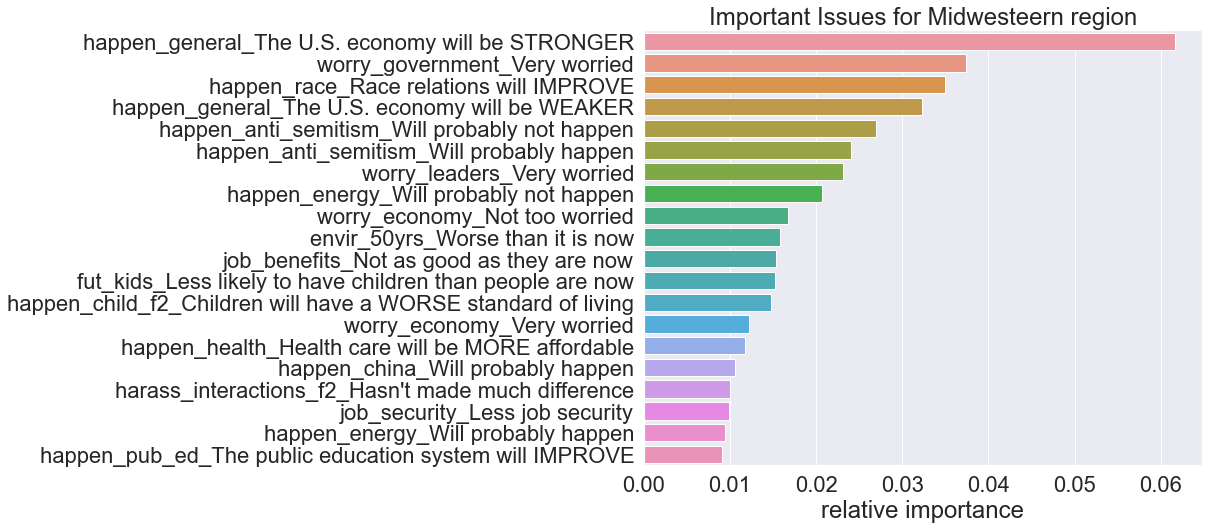

In [317]:
#Make model
rf_depth_0_leaf_4 = RandomForestClassifier(min_samples_leaf=4, max_depth=None)
#Fit Model
rf_depth_0_leaf_4.fit(midwest.X_train_dummies, midwest.y_train_dummies)

#Create data frame of feature importances, using our selected model
feature_importances_midwest = pd.DataFrame(rf_depth_0_leaf_4.feature_importances_, index = midwest.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_midwest = feature_importances_midwest.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_midwest.columns.names = ['category']

#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_midwest = sns.barplot(x=feature_importances_midwest['relative importance'][0:20], y=feature_importances_midwest.index[0:20]).set(title="Important Issues for Midwesteern region")

### Northeast

In [318]:
ne = e.generate_and_return_obj(ne)
ne.X_train_dummies.head()

device_type_Mobile phone  device_type_Tablet  language_Spanish  \
1460                         0                   0                 0   
167                          1                   0                 0   
1644                         1                   0                 0   
1607                         0                   0                 0   
643                          0                   0                 0   

      form_Form 2  happen_general_The U.S. economy will be STRONGER  \
1460            1                                                 1   
167             0                                                 1   
1644            0                                                 1   
1607            1                                                 1   
643             1                                                 0   

      happen_general_The U.S. economy will be WEAKER  \
1460                                               0   
167                                                0   
1644                                               0   
1607                                               0   
643                                                1   

      happen_health_Health care will be MORE affordable  \
1460                                                  1   
167                                                   0   
1644                                                  1   
1607                                                  0   
643                                                   0   

      happen_health_Refused  happen_race_Race relations will IMPROVE  \
1460                      0                                        1   
167                       0                                        0   
1644                      0                                        0   
1607                      0                                        1   
643                       0                                        0   

      happen_race_Refused  ...  \
1460                    0  ...   
167                     0  ...   
1644                    0  ...   
1607                    0  ...   
643                     0  ...   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
1460                                                  0                                                    
167                                                   0                                                    
1644                                                  0                                                    
1607                                                  0                                                    
643                                                   0                                                    

      registered_to_vote_nan  political_views_Liberal  \
1460                       0                        0   
167                        0                        0   
1644                       0                        0   
1607                       0                        0   
643                        0                        1   

      political_views_Moderate  political_views_Refused  \
1460                         1                        0   
167                          1                        0   
1644                         1                        0   
1607                         1                        0   
643                          0                        0   

      political_views_Very conservative  political_views_Very liberal  \
1460                                  0                             0   
167                                   0                             0   
1644                                  0                             0   
1607                                  0                             0   
643                                   0                             0   

      internet_access_Non Inte

In [319]:
print(f'Baseline Accuracy: {round((1.00 - ne.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 55.28%


In [320]:
# Create a dataframe to store and compare our models' performances
score_df_ne = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_ne

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [321]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_ne = m.test_a_model(ne.X_train_dummies, ne.y_train_dummies, ne.X_validate_dummies, ne.y_validate_dummies, model, name, score_df_ne)

In [333]:
score_df_ne.sort_values(by = 'validate_score', ascending = False).head(10)

model_name  train_score  \
14  including_all_features_random_forest_min_sampl...     0.926829   
43  including_all_features_random_forest_min_sampl...     0.894309   
3   including_all_features_random_forest_min_sampl...     0.902439   
6   including_all_features_random_forest_min_sampl...     0.983740   
57  including_all_features_random_forest_min_sampl...     0.837398   
29  including_all_features_random_forest_min_sampl...     0.853659   
33  including_all_features_random_forest_min_sampl...     0.894309   
13  including_all_features_random_forest_min_sampl...     0.918699   
12  including_all_features_random_forest_min_sampl...     0.918699   
23  including_all_features_random_forest_min_sampl...     0.902439   

    validate_score  
14        0.849057  
43        0.830189  
3         0.830189  
6         0.830189  
57        0.830189  
29        0.811321  
33        0.811321  
13        0.811321  
12        0.811321  
23        0.811321

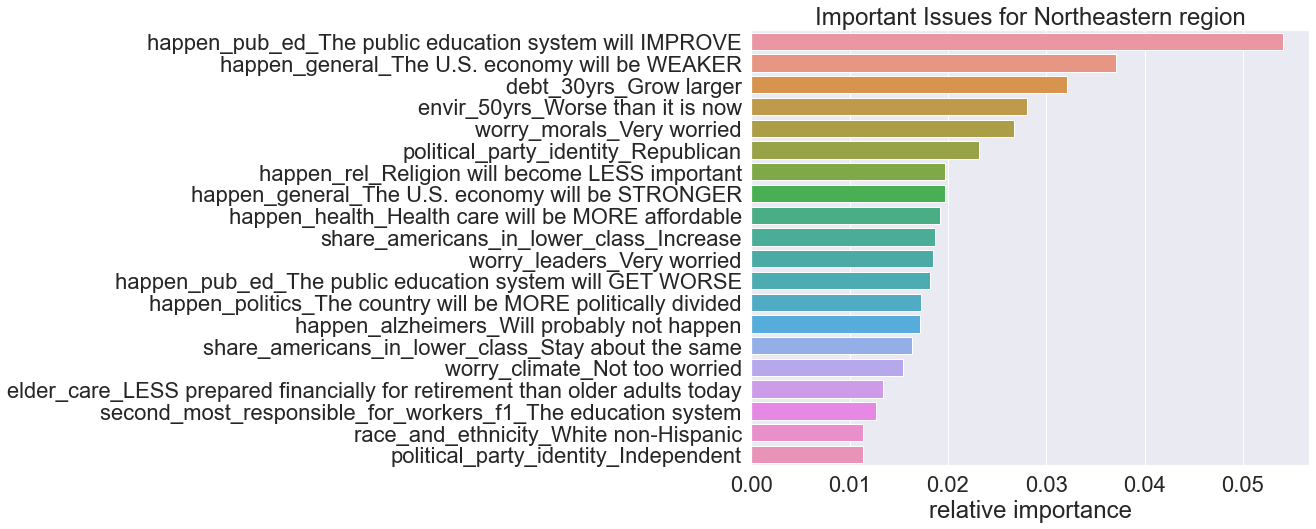

In [323]:
#Make model
rf_depth_7_leaf_8 = RandomForestClassifier(min_samples_leaf=8, max_depth=7)
#Fit Model
rf_depth_7_leaf_8.fit(ne.X_train_dummies, ne.y_train_dummies)

#Create data frame of feature importances, using our selected model
feature_importances_ne = pd.DataFrame(rf_depth_7_leaf_8.feature_importances_, index = ne.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_ne = feature_importances_ne.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_ne.columns.names = ['category']

#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_ne = sns.barplot(x=feature_importances_ne['relative importance'][0:20], y=feature_importances_ne.index[0:20]).set(title="Important Issues for Northeastern region")

### West

In [324]:
west = e.generate_and_return_obj(w_df)
west.X_train_dummies.head()

device_type_Mobile phone  device_type_Tablet  language_Spanish  \
794                          1                   0                 1   
1030                         1                   0                 0   
2398                         0                   0                 0   
2330                         1                   0                 0   
32                           0                   0                 0   

      form_Form 2  happen_general_The U.S. economy will be STRONGER  \
794             0                                                 0   
1030            1                                                 0   
2398            0                                                 0   
2330            1                                                 0   
32              1                                                 0   

      happen_general_The U.S. economy will be WEAKER  \
794                                                1   
1030                                               0   
2398                                               1   
2330                                               1   
32                                                 1   

      happen_health_Health care will be MORE affordable  \
794                                                   0   
1030                                                  1   
2398                                                  1   
2330                                                  1   
32                                                    0   

      happen_health_Refused  happen_race_Race relations will IMPROVE  \
794                       0                                        1   
1030                      0                                        1   
2398                      0                                        1   
2330                      0                                        1   
32                        0                                        0   

      happen_race_Refused  ...  \
794                     0  ...   
1030                    0  ...   
2398                    0  ...   
2330                    0  ...   
32                      0  ...   

      registered_to_vote_You are NOT registered to vote at your current address  \
794                                                   0                           
1030                                                  0                           
2398                                                  0                           
2330                                                  0                           
32                                                    0                           

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
794                                                   0                                                    
1030                                                  0                                                    
2398                                                  0                                                    
2330                                                  1                                                    
32                                                    0                                                    

      registered_to_vote_nan  political_views_Liberal  \
794                        0                        1   
1030                       0                        0   
2398                       0                        1   
2330                       0                        0   
32                         0                        0   

      political_views_Moderate  political_views_Refused  \
794                          0                        0   
1030                         1                        0   
2398                         0                        0   
2330                         1                        0   
32                           0

In [325]:
print(f'Baseline Accuracy: {round((1.00 - west.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 51.76%


In [326]:
# Create a dataframe to store and compare our models' performances
score_df_west = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_west

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [327]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_west = m.test_a_model(west.X_train_dummies, west.y_train_dummies, west.X_validate_dummies, west.y_validate_dummies, model, name, score_df_west)

In [332]:
score_df_west.sort_values(by = 'validate_score', ascending = False).head(10)

model_name  train_score  \
42  including_all_features_random_forest_min_sampl...     0.911765   
0   including_all_features_random_forest_min_sampl...     0.788235   
18  including_all_features_random_forest_min_sampl...     0.776471   
36  including_all_features_random_forest_min_sampl...     0.782353   
20  including_all_features_random_forest_min_sampl...     0.876471   
61  including_all_features_random_forest_min_sampl...     0.911765   
60  including_all_features_random_forest_min_sampl...     0.900000   
54  including_all_features_random_forest_min_sampl...     0.800000   
40  including_all_features_random_forest_min_sampl...     0.905882   
1   including_all_features_random_forest_min_sampl...     0.823529   

    validate_score  
42        0.824324  
0         0.810811  
18        0.810811  
36        0.810811  
20        0.810811  
61        0.797297  
60        0.797297  
54        0.797297  
40        0.797297  
1         0.797297

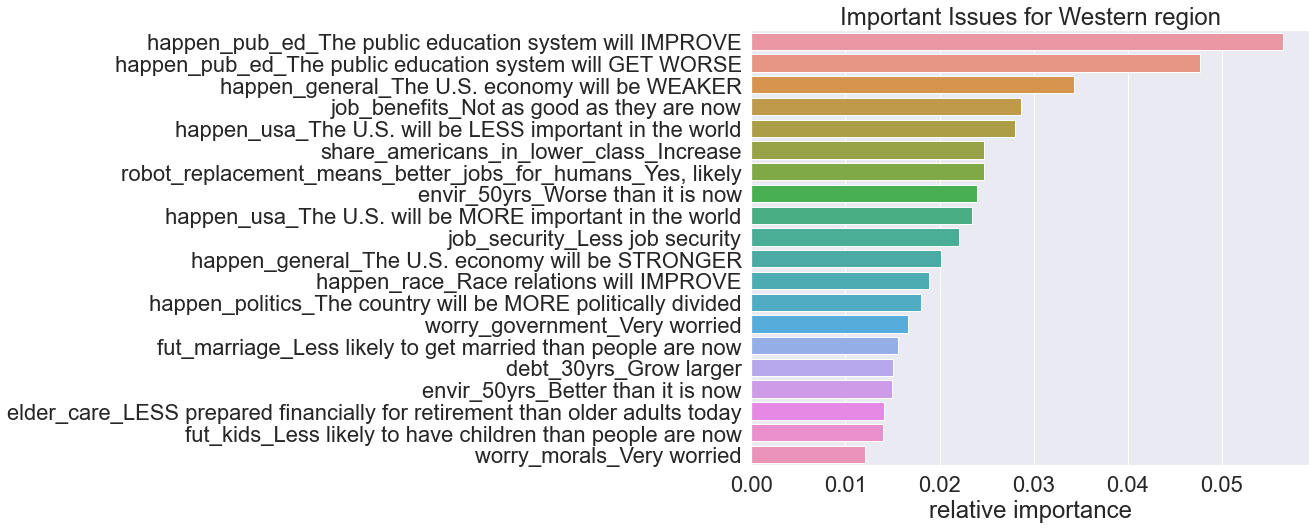

In [329]:
#Make model
rf_depth_6_leaf_7 = RandomForestClassifier(min_samples_leaf=7, max_depth=6)
#Fit Model
rf_depth_6_leaf_7.fit(west.X_train_dummies, west.y_train_dummies)

#Create data frame of feature importances, using our selected model
feature_importances_west = pd.DataFrame(rf_depth_6_leaf_7.feature_importances_, index = west.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_west = feature_importances_west.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_west.columns.names = ['category']

#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_west = sns.barplot(x=feature_importances_west['relative importance'][0:20], y=feature_importances_west.index[0:20]).set(title="Important Issues for Western region")

## Region Plots

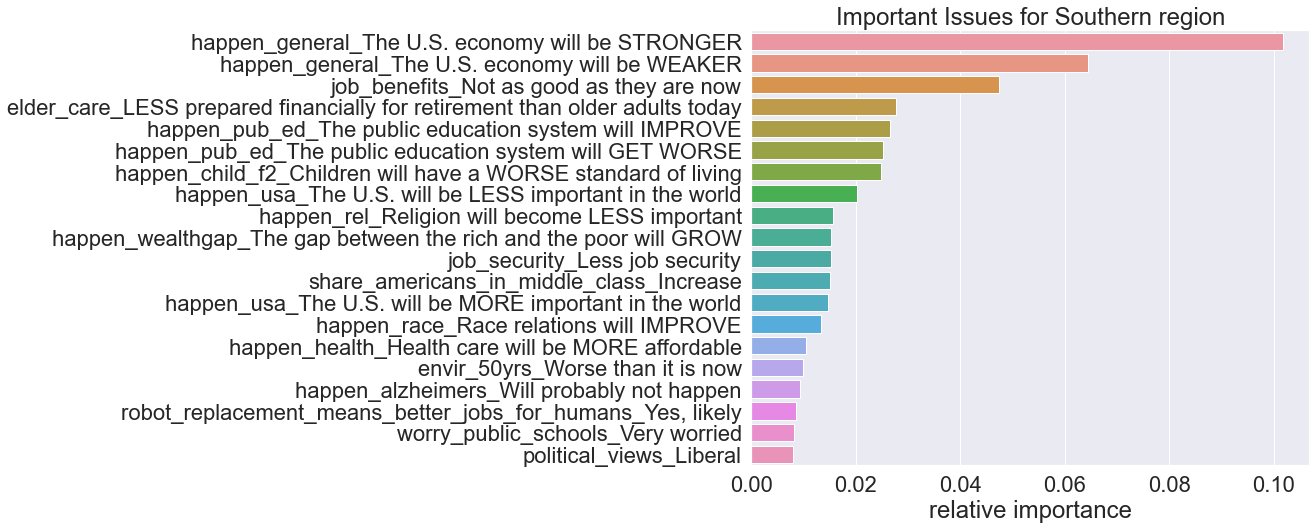

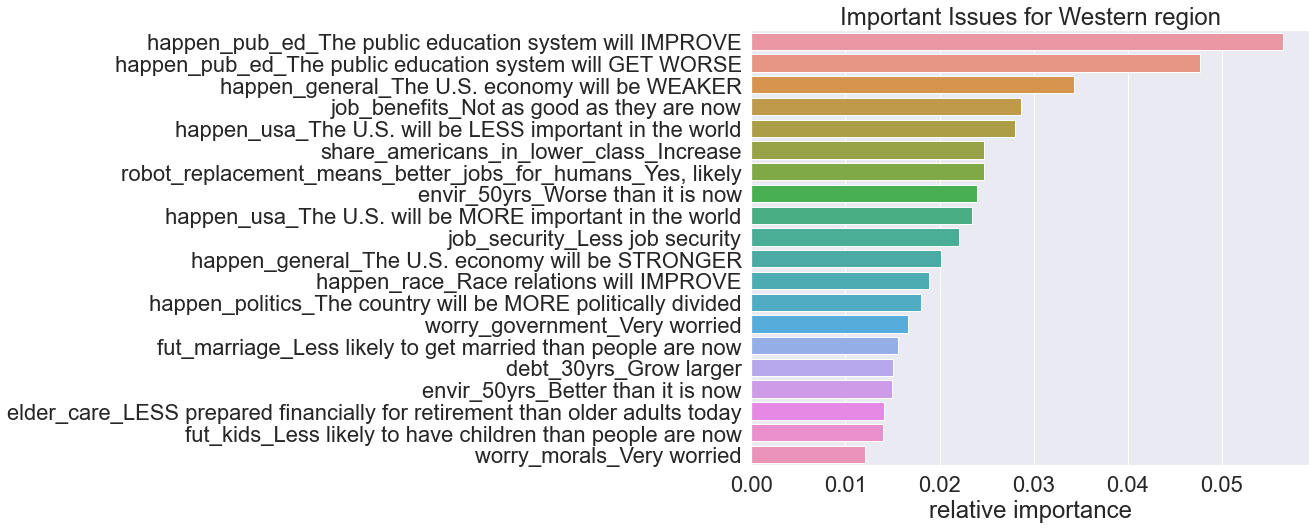

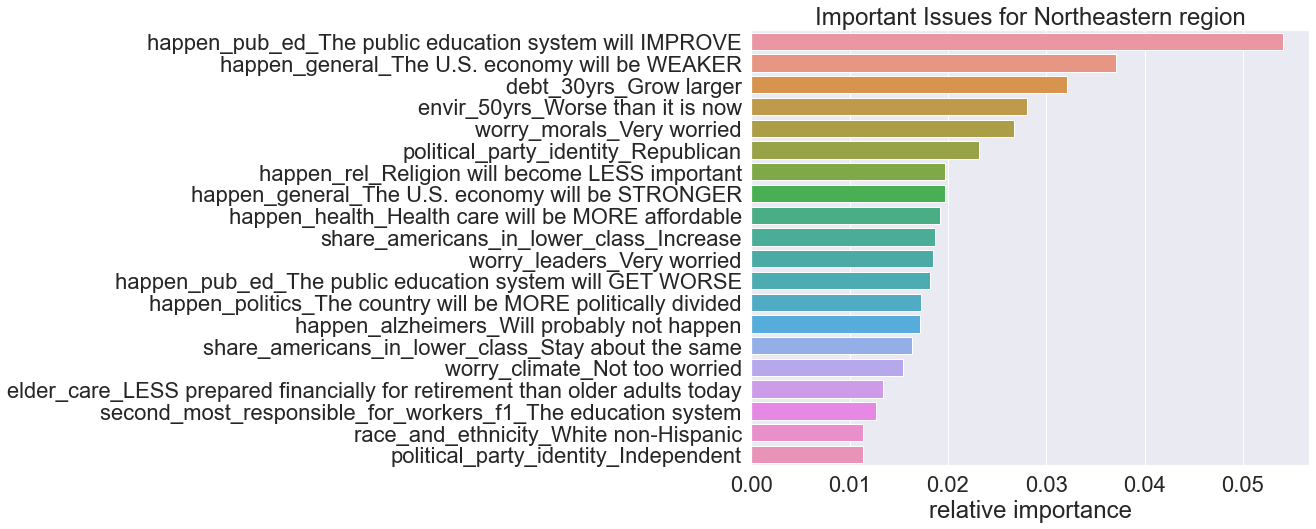

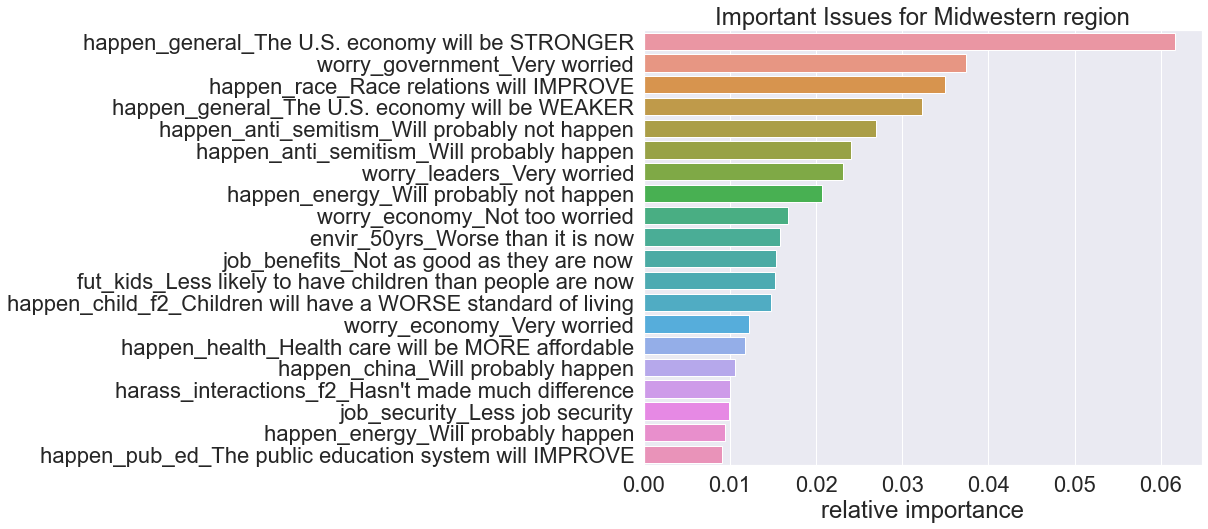

In [330]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_south = sns.barplot(x=feature_importances_south['relative importance'][0:20], y=feature_importances_south.index[0:20]).set(title="Important Issues for Southern region")

#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_west = sns.barplot(x=feature_importances_west['relative importance'][0:20], y=feature_importances_west.index[0:20]).set(title="Important Issues for Western region")

#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_ne = sns.barplot(x=feature_importances_ne['relative importance'][0:20], y=feature_importances_ne.index[0:20]).set(title="Important Issues for Northeastern region")

#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_midwest = sns.barplot(x=feature_importances_midwest['relative importance'][0:20], y=feature_importances_midwest.index[0:20]).set(title="Important Issues for Midwestern region")

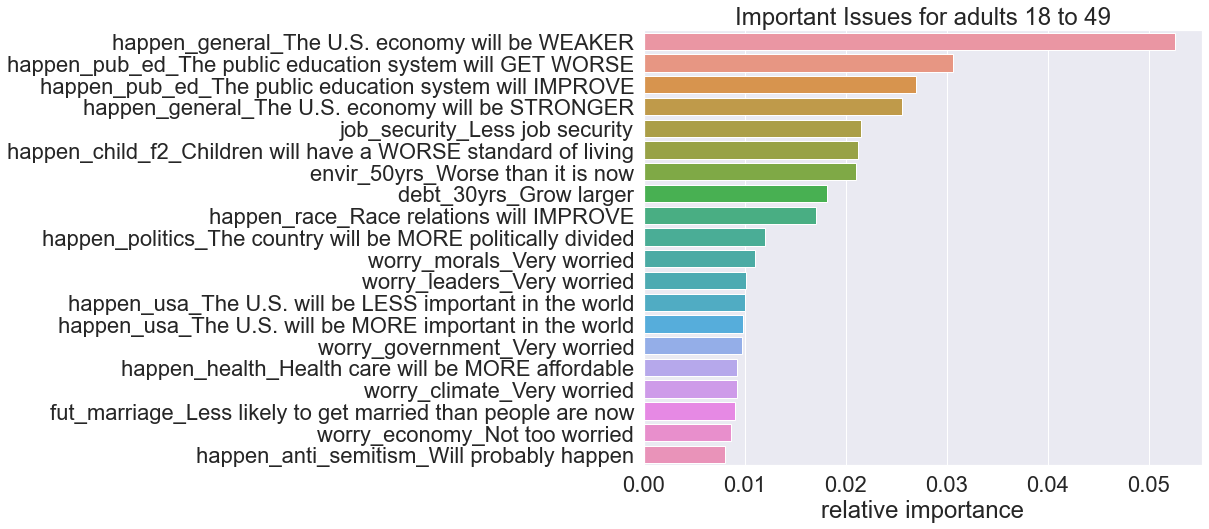

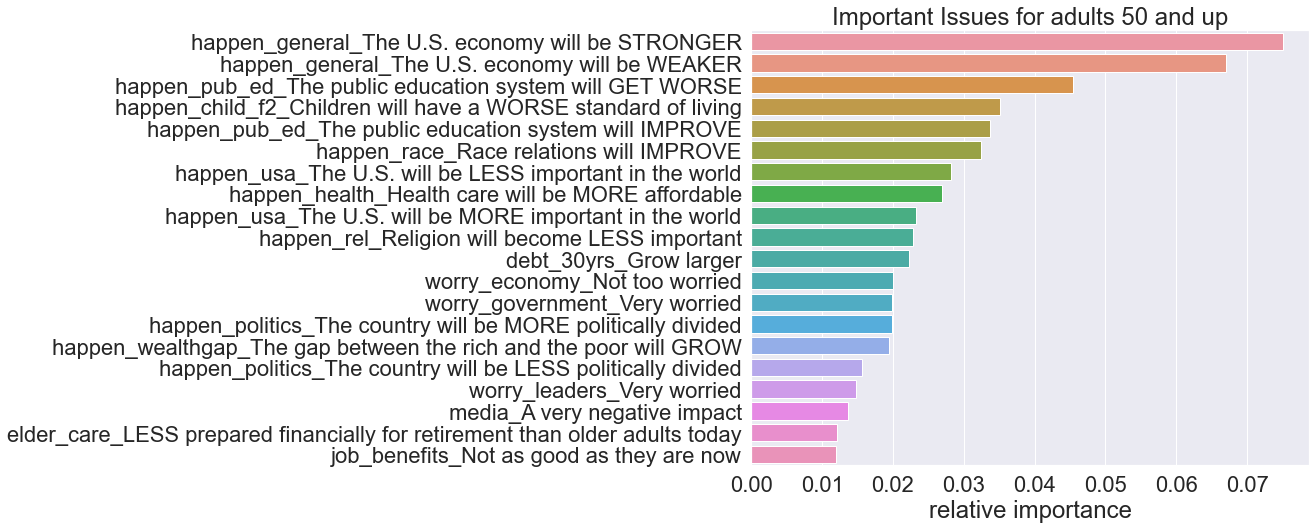

In [351]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_younger = sns.barplot(x=feature_importances_younger['relative importance'][0:20], y=feature_importances_younger.index[0:20]).set(title="Important Issues for adults 18 to 49")

#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_older = sns.barplot(x=feature_importances_older['relative importance'][0:20], y=feature_importances_older.index[0:20]).set(title="Important Issues for adults 50 and up")